<div style="background-image: https://www.brgm.fr/sites/default/files/styles/page_top_banner/public/images_banner/2022-07/banniere-0334.jpg.webp; background-position: 0% 5%; padding: 10px; display: flex;">
    <div style="display: flex; align-items: left;">
        <img width="180" height="150" src="../assets/logo_pymarthe.png" alt="logo_pymarthe">
        <div style="text-align: center; align-items: center; padding-left: 40px; padding-top:40px;">
            <p style="color: black; font-size: 60px;"><b>Basic Usage Guide 🤵</b></p>
            <p style="color: #2b2b2b; font-size: 22px; padding-top:10px"><i>Be ready to discover the key features of the librairy</i></p>
            <p style="color: white; font-size: 18px; text-align: right; padding-top: 50px;">
                <i><b>Novice</b></i>✅ - <i><b>Intermediate</b></i>✅ - <i><b>Expert</b></i>✅
            </p>
        </div>
    </div>
</div>

<br>

`PyMarthe` is a python wrapper acting as a _"coupling interface"_ between [**MARTHE (v7.5)**](https://www.brgm.fr/fr/logiciel/marthe-logiciel-modelisation-ecoulements-souterrains) hydrogeological numerical models design by the **BRGM** and optimization algorithms provided by the [**PEST++**](https://github.com/usgs/pestpp) facilities.

<p align="center">
  <img 
  src="../assets/PyMarthe_v1.0_general.png"
  alt="PyMarthe v1.0" 
  width="650"
  height="415"
  >
</p>

📢 The `PyMarthe` library provides to the user the ability to read a **Marthe** transient groundwater flow model (_.rma_ file), load and browse **distributed hydrodynamic** data as well as **soil** and **pumping** data. Moreover, it allows to easily run the model without any **G**raphical **U**ser **I**nterface.
<br>
In this initiation, we will manipulate the following models provided in `examples/`:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;➤ **MONA** _(**MO**dèle **N**ord **A**quatain)_ : _`examples/monav3/`_

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;➤ **Lizonne**: _`examples/lizonnev2/`_

<br>
To begin with, let's set the notebook environement.

In [344]:
# ---- Import basic modules
import os, sys
import pandas as pd
import numpy as np

# -- Import visualisation modules
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import ListedColormap
%matplotlib inline

# -- Set relative pymarthe path
sys.path.insert(0, '..')

# -- Import pymarthe modules
from pymarthe import MartheModel
from pymarthe.utils import marthe_utils, shp_utils
from pymarthe.mfield import MartheField, MartheFieldSeries
from pymarthe.mpump import MarthePump
from pymarthe.msoil import MartheSoil

# ---- Set model's relative paths
mona_ws = os.path.join( 'monav3', 'mona.rma')
mona_si = os.path.join('monav3', 'mona_si')
lizonne_ws = os.path.join('lizonnev2', 'Lizonne.rma')
lizonne_si = os.path.join('lizonnev2', 'Lizonne_si')

# -- Set MARTHE model executable name
EXE_NAME = 'Marth_R8' # Make sure to put yours!

# -- Set table style html render
table_style = [
    dict(selector="tr:hover", props=[("background", "#D6EEEE")]),
    dict(selector="th.col_heading", props=[("color", "#fff"),
                                           ("border", "1px solid #eee"),
                                           ("padding", "10px 30px"),
                                           ("border-collapse", "collapse"),
                                           ("background", "#4a4a4a"),             
                                           ("font-size", "16px")]),
    dict(selector="th.row_heading", props=[("color", "#fff"),
                                           ("border", "1px solid #eee"),
                                           ("padding", "10px 30px"),
                                           ("border-collapse", "collapse"),
                                           ("background", "#4a4a4a"),
                                           ("font-size", "12px"),
                                           ("font-style", "italic")]),
    dict(selector="td", props=[("border", "1px solid #eee"),
                               ("padding", "5px 15px"),
                               ("border-collapse", "collapse"),
                               ("font-size", "14px")]),
    dict(selector="table", props=[("font-family" , 'Helvetica'),
                                  ("margin" , "20px auto"),
                                  ("border-collapse" , "collapse"),
                                  ("border" , "1px solid #eee"),
                                  ("border-bottom" , "2px solid #00cccc")]),
    dict(selector="thead", props=[("background-color", "white"),
                                  ("color", "black"),
                                  ("align", "left"),
                                  ("font-size", "16px")])
]

# 🎇 **`MartheModel` instance** 🎇

The principal class instance of PyMarthe is called `MartheModel`. It allows the user to _load_ a **Marthe** model as a _python_ object.

## 👉 Basic model loading & attributs 

The `MartheModel` instance collects all related model files and parses some of them to extract usefull informations such as:

- `mlname`_(`str`)_: the model name
- `mldir` _(`str`)_: the relative path to the model main _.rma_ file
- `nstep` _(`int`)_: number of time steps of the transient model
- `nnest` _(`int`)_: number of nested grids
- `mlfiles` _(`dict`)_: related modelfiles pointed in the main _.rma_ file
- `units` _(`dict`)_: the model units converters
- `layers_infos` _(`DataFrame`)_: global informations about layers
- `mldates` _(`DatetimeIndex`, `TimedeltaIndex`)_: the calendar dates of time steps (provide in _.pastp_ file)

In [303]:
# -- Basic model loading (MONA model)
mm = MartheModel(mona_ws)

# -- Model name and path
print(f'Model directory: {mm.mldir}')
print(f'Model name: {mm.mlname}')

# -- Number of time steps, nested grids, layers, cells per layer
print(f'Number of timesteps: {mm.nstep}')
print(f'Number of nested grids: {mm.nnest}')
print(f'Number of layers: {mm.nlay}')
print(f'Number of cells/layer: {mm.ncpl}')

# -- Related Marthe files
print('\nRelated Marthe files:\n', '\t- '.join([f"'{k}': {v}" for k, v in mm.mlfiles.items()]))

# -- Model units
print('\nModel units:\n', mm.units)

# -- Unit examples
print(f"\nModel flow unit: {str(mm.units['flow'])} m/s")
print(f"Model distance unit: {mm.units['modeldist']} m")
print(f"Model time unit: {mm.units['modeltime']} (=years)")

# -- Layers informations
print('\nLayers informations:\n', mm.layers_infos.to_markdown(index=False, tablefmt='fancy'))

# -- Transient model dates
print('\nModel dates:\n', mm.mldates)

Model directory: monav3
Model name: mona
Number of timesteps: 40
Number of nested grids: 0
Number of layers: 15
Number of cells/layer: 18944

Related Marthe files:
 'permh': monav3\mona.permh	- 'debit': monav3\mona.debit	- 'charg': monav3\mona.charg	- 'emmca': monav3\mona.emmca	- 'emmli': monav3\mona.emmli	- 'hsubs': monav3\mona.hsubs	- 'topog': monav3\mona.topog	- 'zonep': monav3\mona.zonep	- 'idebo': monav3\mona.idebo	- 'sepon': monav3\mona.sepon	- 'kepon': monav3\mona.kepon	- 'mart': monav3\mona.mart	- 'pastp': monav3\mona.pastp	- 'liais': monav3\mona.liais	- 'aff_r': monav3\mona.aff_r	- 'trc_r': monav3\mona.trc_r	- 'lon_r': monav3\mona.lon_r	- 'lar_r': monav3\mona.lar_r	- 'hau_r': monav3\mona.hau_r	- 'epai_r': monav3\mona.epai_r	- 'perm_r': monav3\mona.perm_r	- 'arb_r': monav3\mona.arb_r	- 'fon_r': monav3\mona.fon_r	- 'layer': monav3\mona.layer	- 'histo': monav3\mona.histo	- 'meteo': monav3\mona.meteo	- 'zoneg2': monav3\mona.zoneg2

Model units:
 {'permh': 1, 'flow': 1.15741e-05, '

The `MartheModel` instance also store information about **refine levels** of **nested grids** in
the attribute `.rlevels`. This is a basic dictionary with format:
```python
rlevels = {inest_0: None,
           inest_1: refine_level_1, 
           ...: ..., 
           inest_N: refine_level_N}
```

Obviously, the main grid (`inest=0`) does not contain refined informations (`inest_0 = None`). The values of `rlevels` dictionary correspond to the the number of division of a parent cell (main grid) for each direction **x** and **y**. For example, a refine level of $5$ means that the adjacent cells of the grid (parent cells) will be divided in $5$ cells on _x-direction_ and $5$ cells on _y-direction_ ($5$x$5=25$ child cells).

In [34]:
# -- Model nested grid refine level
print('Refine levels:', mm.rlevels)

Refine levels: {0: None}


## 👉 Spatial index 

The `MartheModel` instance provided the creation of a **spatial index** based on `rtree` package. It will create a unique _id_ for each model cells and store some usefull related data about the cell such as:
- `node` : _cell unique id_
- `layer`: _layer id_
- `inest`: _nested grid id_
- `i`    : _cell row number_
- `j`    : _cell column number_
- `xcc`  : _x-coordinate of the cell center_
- `ycc`  : _y-coordinate of the cell center_
- `dx`   : _cell x-extension (width)_
- `dy`   : _cell y-extension (height)_
- `area` : _cell surface (area)_
- `vertices`: _xy-coordinates of cell vertices (closed)_
- `active`: _cell activity (0=inactive, 1=active)_

 
The created **spatial index** will be stored as 2 external files:

- `.idx` : binary file containing cell ids
- `.dat` : text file containing related cell data

The management of the index creation pass through the argument `spatial_index`.
It can be:

- `True`: generate generic spatial index _(`modelname_si.idx`, `modelname_si.dat`)_
- `False`: disable spatial index creation
- `filename`: path to an existing spatial index to read
- `dict`: generate spatial index with custom options

The custom form to implement **spatial index** can contains keys like

- `name` : custom name to external spatial index files
- `only_active`: disable the insertion of inactive cells in the spatial index.

<div class="alert alert-danger" role="alert">
    <span style="color: red; font-size: 16px; font-weight: bold;">⛔ CAREFUL: </span>
    <span style="color: darkred;"> even though setting <code>only_active=True</code> can be usefull for faster spatial index creation (especially on large models with nested grids) it is <b>not recommended</b> because some processes could be affected and not working as usal.
    </span>
</div>

In fact, building a **spatial index** can be slow for large **Marthe** model with several cells, layers and nested grids.A progress bar will be shown on the terminal to appreciate the **spatial index** creation run time.

Let's read the **MONA** model and build carry out **spatial index** management.

In [ ]:
# -- loading model with spatial index creation facility
# -> Default (light process)
mm = MartheModel(mona_ws, spatial_index=False)

# -- Build spatial index a posteriori
mm.build_spatial_index(name=None, only_active=False)

# -- Generic spatial index
# mm = MartheModel(mona_ws, spatial_index=True)

# -- Custom filename spatial index
# custom_si = {'name': mona_ws.replace('.rma', '_custom_si'),
#              'only_active': True}
# mm = MartheModel(mona_ws, spatial_index=custom_si)

# -- From an existing spatial index
# mm = MartheModel(mona_ws, spatial_index=mona_si)

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> feel free to comment/uncomment the previous code lines to isolate each spatial index creations.
    </span>
</div>

Creating or loading a **spatial index** is not mandatory for working with the **Marthe** model. However, it is necessary when using spatial sampling processes, i.e. extracting cell ids (_nodes_) from _xy_coordinate_. In fact, this sampling process will use the **spatial index** to intersects each required points with the model the grid.

The high level function `.get_node()` can simplify this process with a battery of checks to avoid bad inputs.
Let's try it!

In [284]:
# -- Insure that the model contains spatial index object
if not bool(mm.si_state):
    mm.build_spatial_index()


Building spatial index ...
[================================================  ] 96%[=================================                 ] 66%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================= ] 99%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [289]:
# -- Setting 3 points from xy-coordinates
points = np.array([(323.1, 277.1),  # P1
                   (333.4, 289.3),   # P2
                   (346.7, 289.5)]) # P3
points

array([[323.1, 277.1],
       [333.4, 289.3],
       [346.7, 289.5]])

In [300]:
# -- Extract all nodes for all points
x, y = np.column_stack(points)
print(mm.get_node(x, y))

[[9935, 28879, 47823, 66767, 85711, 104655, 123599, 142543, 161487, 180431, 199375, 218319, 237263, 256207, 275151], [9052, 27996, 46940, 65884, 84828, 103772, 122716, 141660, 160604, 179548, 198492, 217436, 236380, 255324, 274268], [9059, 28003, 46947, 65891, 84835, 103779, 122723, 141667, 160611, 179555, 198499, 217443, 236387, 255331, 274275]]


<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> by default, all vertical intersected nodes corresponding to the <i>xy-coordinates</i> will be returned.
    </span>
</div>

In [299]:
# -- Without specific layer but active cell only
print(mm.get_node(x, y, only_active=True))

[[9935, 28879, 47823, 66767, 85711, 104655, 123599, 142543, nan, nan, nan, 218319, nan, 256207, nan], [9052, 27996, 46940, 65884, 84828, 103772, 122716, 141660, 160604, 179548, 198492, nan, nan, 255324, nan], [9059, 28003, 46947, 65891, 84835, 103779, 122723, 141667, 160611, 179555, 198499, nan, nan, 255331, nan]]


<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> when setting <code>only_active=True</code>, inactive intersected nodes will not be removed but set to <code>nan</code>. This makes vertical inactive nodes identification possible while maintaining a uniform number of dimensions (<code>.nlay</code>).
    </span>
</div>

In [301]:
# -- Specifying a common target layer for all points
print(mm.get_node(x, y, layer=4))

[85711, 84828, 84835]


In [302]:
# -- Specifying target layer for each points
print(mm.get_node(x, y, layer=[0, 3, 2]))

[9935, 65884, 46947]


Since the **spatial index** allows to extract the cell ids from a _xy-location_, it is possible to retrieve the corresponding `layer` id given a bunch of _xy-coordinates_ and their related target `depths` values. A _builtin_ method named `.get_layer_from_depth` was implemented to carry out this process. 

In [314]:
# -- Settings research depths
depths = [96.2, 223.1, 368]  # in meters
# -- Extracting layer ids from xy-depths informations
mm.get_layer_from_depth(x, y, depth=depths, as_list=False)

C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: invalid value encountered in divide
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: divide by zero encountered in divide


x      y  depth  layer     name
2  323.1  277.1   96.2      2  layer_2
3  333.4  289.3  223.1      3  layer_3
5  346.7  289.5  368.0      5  layer_5

<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;">this method is still experimental and may not work properly!</span>
</div>

## 👉 The `modelgrid` object 

The `MartheModel` can store grid cell informations in a large `DataFrame` object named: `.modelgrid`.

Sometimes, performing queries on grid data is needed. That can be done using the basic `pandas.DataFrame` slicing facilities such as `loc`, `.iloc`, `.query()`.

If the user is not yet confortable with these `pandas` syntaxes the `MartheModel` instance provide a built-in high level method named `.query_grid()`. This method allows the user to pass some _query_ variables and a potential _target_ one (=required grid informations to extract).It performs some additionnal checking on _query_ and _target_ variables and targets to avoid invalid manipulations (but much much slower than `pandas`).


Let's reach `.modelgrid` attribut.

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> The <code>.modelgrid</code> attribut <b>do not required a spatial index</b> to be created, but keep in mind that the grid queries can not perform sampling or intersection processes.
    </span>
</div>

In [41]:
# -- Building from constructor
mm = MartheModel(mona_ws, modelgrid=True)

# -- Building a posterior
mm = MartheModel(mona_ws, modelgrid=False)
mm.build_modelgrid()

# -- Quick look on modelgrid data
mm.modelgrid.head()

node  layer  inest  i  j    xcc    ycc   dx   dy  area   
0     0      0      0  0  0  285.5  411.0  2.0  2.0   4.0  \
1     1      0      0  0  1  287.5  411.0  2.0  2.0   4.0   
2     2      0      0  0  2  289.5  411.0  2.0  2.0   4.0   
3     3      0      0  0  3  291.5  411.0  2.0  2.0   4.0   
4     4      0      0  0  4  293.5  411.0  2.0  2.0   4.0   

                                                           vertices  active  
0  [[284.5, 410.0], [284.5, 412.0], [286.5, 412.0], [286.5, 410.0]]     0.0  
1  [[286.5, 410.0], [286.5, 412.0], [288.5, 412.0], [288.5, 410.0]]     0.0  
2  [[288.5, 410.0], [288.5, 412.0], [290.5, 412.0], [290.5, 410.0]]     0.0  
3  [[290.5, 410.0], [290.5, 412.0], [292.5, 412.0], [292.5, 410.0]]     0.0  
4  [[292.5, 410.0], [292.5, 412.0], [294.5, 412.0], [294.5, 410.0]]     0.0

Now, let's perform some basic grid queries.

### ☛ Invalid queries

In [59]:
# -- Invalid target variables names
mm.query_grid(node=[45, 678, 3578], target=['i', 'J']) # must be target=['i', 'j']

AssertionError: ERROR : some `target` values not found in modelgrid or already use for grid query: 'J'.

In [45]:
# -- Invalid query variables names
mm.query_grid(nodes=[53, 67], target=['i', 'j']) # must be node=[53, 67]

AssertionError: ERROR : some query names not found in modelgrid : 'nodes'.

In [46]:
# -- Invalid query variables length
mm.query_grid(i=[34, 67], j=[45, 65], layer=2) # must be layer=[2, 2]

AssertionError: ERROR : all query values must have the same length. Given : 2, 2, 1.

### ☛ Simple queries

<p style="color:orange; font-size:1.2em;"><i>⚡Get cell vertices from cell nodes</i></p>

In [54]:
# -- With pymarthe
mm.query_grid(node=[45, 678, 3578], target='vertices')

vertices
node                                                                  
45    [[374.5, 410.0], [374.5, 412.0], [376.5, 412.0], [376.5, 410.0]]
678   [[456.5, 402.0], [456.5, 404.0], [458.5, 404.0], [458.5, 402.0]]
3578  [[336.5, 362.0], [336.5, 364.0], [338.5, 364.0], [338.5, 362.0]]

In [55]:
# -- With pandas
mm.modelgrid.loc[mm.modelgrid.node.isin([45, 678, 3578]), ['vertices']]

vertices
45    [[374.5, 410.0], [374.5, 412.0], [376.5, 412.0], [376.5, 410.0]]
678   [[456.5, 402.0], [456.5, 404.0], [458.5, 404.0], [458.5, 402.0]]
3578  [[336.5, 362.0], [336.5, 364.0], [338.5, 364.0], [338.5, 362.0]]

<p style="color:orange; font-size:1.2em;"><i>⚡Get cell xy resolution from row, column, layer</i></p>

In [57]:
# -- With pymarthe
mm.query_grid(i=34, j=65, layer=4, target=['dx', 'dy'])

dx   dy
i  j  layer          
34 65 4      2.0  2.0

In [58]:
# -- Get cell xy resolution from row, column, layer (with pandas)
mm.modelgrid.query("i == 34 & j == 65 & layer == 4")[['dx', 'dy']]

dx   dy
80873  2.0  2.0

### ☛ More complex queries

<p style="color:orange; font-size:1.2em;"><i>⚡Get all active nodes of the first 2 layers</i></p>

In [63]:
# -- With pymarthe
mm.query_grid(layer=[0, 1], active=[1, 1], target='node')

node
layer active       
0     1.0      5352
      1.0      5353
      1.0      5354
      1.0      5355
      1.0      5496
...             ...
1     1.0     37054
      1.0     37055
      1.0     37201
      1.0     37202
      1.0     37203

[5101 rows x 1 columns]

In [64]:
# -- With pandas
mm.modelgrid.query("layer.isin([0, 1]) & active == 1")[['node']]

node
5352    5352
5353    5353
5354    5354
5355    5355
5496    5496
...      ...
37054  37054
37055  37055
37201  37201
37202  37202
37203  37203

[5101 rows x 1 columns]

<p style="color:orange; font-size:1.2em;"><i>⚡Get superficie of the first 5 layers</i></p>

In [83]:
# -- Set layer ids
layers = list(range(5))

In [84]:
# -- With pymarthe
mm.query_grid(layer=layers, active=[1]*len(layers))['area'].groupby(level=0).sum()

layer
0    11496.0
1     8908.0
2    12644.0
3    16220.0
4    15596.0
Name: area, dtype: float64

In [85]:
# -- With pandas
mm.modelgrid.query('layer in @layers & active == 1').groupby('layer').sum()['area']

layer
0    11496.0
1     8908.0
2    12644.0
3    16220.0
4    15596.0
Name: area, dtype: float64

### ☛ Pandas vs Pymarthe run time queries comparison

In [92]:
%%timeit
# -- Pymarthe
mm.query_grid(j=53, layer=3, target=['dx', 'dy'])

111 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [93]:
%%timeit
# -- Pandas (query)
mm.modelgrid.query("j == 53 & layer == 3")[['dx', 'dy']]

3.52 ms ± 189 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [94]:
%%timeit
# -- Pandas (loc)
mm.modelgrid.loc[(mm.modelgrid.j == 53) & (mm.modelgrid.layer == 3),['dx', 'dy']]

1.22 ms ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### ☛ Additional _z-dimension_

By default, the `.modelgrid` is _2D-focused_ (xy-informations). If the user wants to access the full _xyz_-cell informations, there is an `add_z` _boolean_ arguments for that. It will compute and extract the _z-dimension_ data from others **Marthe** model files and add the following columns:

- `zcc`: z-coordinate of the cell centroid
- `dz`: cell thickness
- `bottom`: cell bottom altitud
- `top`: cell top altitud
- `volume`: cell volume ($L^3$)

<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> Building <code>modelgrid</code> with additional <i>z-dimension</i> can take a while for large models since the vertical information has to be extracted from <i>topog</i>, <i>hsubs</i> and even <i>sepon</i> fields for implicit model.
    </span>
</div>

In [103]:
# -- Building modelgrid with additional z-dimension
mm.build_modelgrid(add_z=True)
mm.modelgrid.head()

node  layer  inest  i  j    xcc    ycc  zcc   dx   dy  dz  area  volume   
0     0      0      0  0  0  285.5  411.0  NaN  2.0  2.0 NaN   4.0     NaN  \
1     1      0      0  0  1  287.5  411.0  NaN  2.0  2.0 NaN   4.0     NaN   
2     2      0      0  0  2  289.5  411.0  NaN  2.0  2.0 NaN   4.0     NaN   
3     3      0      0  0  3  291.5  411.0  NaN  2.0  2.0 NaN   4.0     NaN   
4     4      0      0  0  4  293.5  411.0  NaN  2.0  2.0 NaN   4.0     NaN   

   top  bottom   
0  NaN     NaN  \
1  NaN     NaN   
2  NaN     NaN   
3  NaN     NaN   
4  NaN     NaN   

                                                           vertices  active  
0  [[284.5, 410.0], [284.5, 412.0], [286.5, 412.0], [286.5, 410.0]]     0.0  
1  [[286.5, 410.0], [286.5, 412.0], [288.5, 412.0], [288.5, 410.0]]     0.0  
2  [[288.5, 410.0], [288.5, 412.0], [290.5, 412.0], [290.5, 410.0]]     0.0  
3  [[290.5, 410.0], [290.5, 412.0], [292.5, 412.0], [292.5, 410.0]]     0.0  
4  [[292.5, 410.0], [292.5, 412.0], [294.5, 412.0], [294.5, 410.0]]     0.0

The _z-dimension_ can be very used to perform even more complex queries.

In [124]:
# -- Extract all layer ids that have at least 1 active cell top below -375 mNGF
mm.modelgrid.query("top < -375 & active == 1")['layer'].unique()

# Or if you prefer the .loc[] indexer
# mm.modelgrid.loc[(mm.modelgrid.top.lt(-375)) & (mm.modelgrid.active == 1), 'layer'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14], dtype=int64)

In [130]:
# -- Extract the maximum, minimum and mean active cell volume of the last 5 layers
layers = np.arange(mm.nlay)[-5:]
(
    mm.modelgrid
    .query("layer in @layers & active == 1")
    .groupby('layer')
    .agg({'volume': ['min', 'max', 'mean']})
)

volume                     
         min     max         mean
layer                            
10       4.0  1556.0   353.345450
11       8.0  1980.0   513.823721
12       4.0  1144.0   257.981043
13       4.0  3900.0  1023.206418
14      40.0   708.0   300.252980

<p style="color:#e7c1c1; font-size:1.2em;"><i>❕Imagine performing the same exact query with an <b>GUI</b></i> 🤯</p>

## 👉 The model extension

The `MartheModel` instance provides some usefull basic intern methods to perform basic processing about model extension.

In [132]:
# -- Get model extension (bounding box)
mm.get_extent()

[284.5, 156.0, 580.5, 412.0]

In [133]:
# -- Get edges of model extension
mm.get_edges(closed=False)

[[284.5, 156.0], [284.5, 412.0], [580.5, 412.0], [580.5, 156.0]]

In [134]:
# -- Get all cell centroids
mm.get_xycellcenters(stack=True)

array([[285.5, 411. ],
       [287.5, 411. ],
       [289.5, 411. ],
       ...,
       [575.5, 157. ],
       [577.5, 157. ],
       [579.5, 157. ]])

An additional `.isin_extent()` method allows the user to easily know if a _xy-points_ is included in the model extension. Let's try it out on random exmaple points and confirm by visualizing there position.

In [264]:
# -- Build 2 random xy-points 
p1, p2 = (589, 305), (320, 329)

# -- Check if they are in model extension
for i, p in enumerate([p1, p2]):
    if mm.isin_extent(*p):
        print(f'==> P{i+1} is in model extension!')
    else:
        print(f'==> P{i+1} is not in model extension!')

==> P1 is not in model extension!
==> P2 is in model extension!


(269.275, 604.225, 143.2, 424.8)

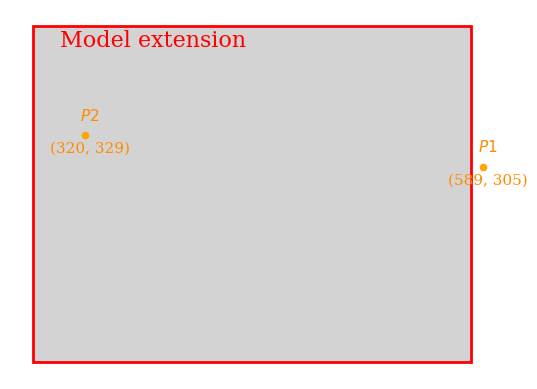

In [366]:
# -- Prepare figure
fig, ax = plt.subplots()
    
# -- Create and add extension rectangle shape
opts = {'fc': 'lightgrey', 'ec': 'r', 'lw': 2}
ext = Polygon(mm.get_edges(closed=True), **opts)
ax.add_patch(ext)
ax.text(x=0.1, y=.9, s='Model extension',
        c='r', fontsize=16, transform=ax.transAxes)

# -- Plot annotated points
ax.scatter(*np.column_stack([p1, p2]), s=20, color='orange', zorder=50)
for i, p in enumerate([p1, p2]):
    x, y = p
    ax.text(x=x + 3, y=y + 3, s='$P{}$\n\n({}, {})'.format(i+1, *p),
            ha='center', va='center', fontsize=11, c='darkorange', zorder=50)
    
# -- Remove plot axis
plt.axis('off')

## 👉 The `CrossSection` object

It can be usefull when working on large multi-layer models to visualize a oriented vertical cross section. `PyMarthe` recently implemented a new utility tools to carry that out thank's to the `pymarthe.utils.xs_utils.CrossSection` class.<br>

The `CrossSection` instance only required 2 input objects:<br>

&emsp;&emsp;➼ `mm`: _the refered `MartheModel` object_<br>
&emsp;&emsp;➼ `cross_section_line`: _a cross section line definition_<br>

The user can define a cross section line through _multiple flexible_ ways and verify its position according to the **model active domain** using the `.plot()` method.<br>

Let's give some examples of cross section worflows.

<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> the <code>CrossSection</code> class requires the additional <code>shapely</code> library. Make sure to install it before loading <i>(<code>pip install shapely</code>)</i>. 
    </span>
</div>

In [4]:
# -- Import the cross section facility tool
from pymarthe.utils.xs_utils import CrossSection

# -- Set cross section lines variables
xslines_dic = {
    'row number': {'row': 38}, # or {'i': 38}
    'colum number': {'column': 45}, # or {'j': 45}
    'x-coordinate': {'x': 351.3},
    'y-coordinate': {'y': 245.7},
    'points': [(330.1, 294.3), (414.2, 212.8), (467.1, 209.2)],
    'shapefile': os.path.join('monav3', 'gis', 'cross_section_line.shp')
}

# -- Initiate Cross Section object
xs = CrossSection(mm, cross_section_line=xslines_dic['shapefile'])

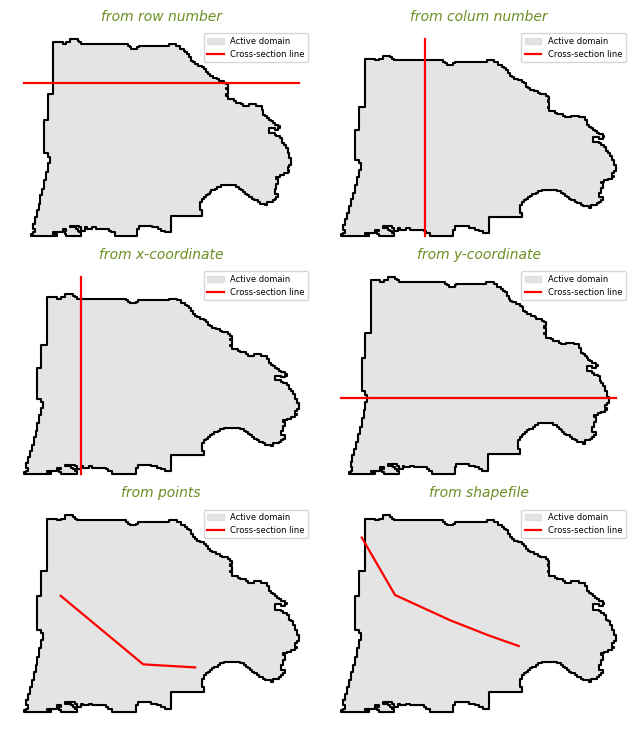

In [70]:
# -- Prepare figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 9),
                         gridspec_kw={'hspace': .1, 'wspace': .05})
axs = axes.ravel()

# -- Iterate over all cross section line definitions
for i, name in enumerate(xslines_dic.keys()):
    # Set cross section line
    xs.set_cross_section_line(xslines_dic[name])
    # -- Plot current cross line location
    axs[i] = xs.plot(ax=axs[i], lw=1.6, c='red')
    # -- Add title
    axs[i].set_title(f'from {name}', fontsize=10,
                     fontstyle='italic', color='#6B8E23')
    # -- Remove axis
    axs[i].set_axis_off()

Going further, the `CrossSection` instance can plot the model cells intercepted by the cross line in a _2D-xz plan_ to visualize the existing layer geometries along the cross section line. The `.plot_xs()` method allows the user to access this plot easily. Custom arguments can be added to change some esthetic settings.<br>
Moreover, setting the `by_layer` argument to `True` will give a different color to each individual crossed layer with the implementation of a annoted colorbar. 
Let's try to plot some cross sections from the _simpliest_ to _fanciest_ ones.

<p style="color: #DB7093; font-size:1.2em;">🚲 <i>Basic cross section plot</i></p>

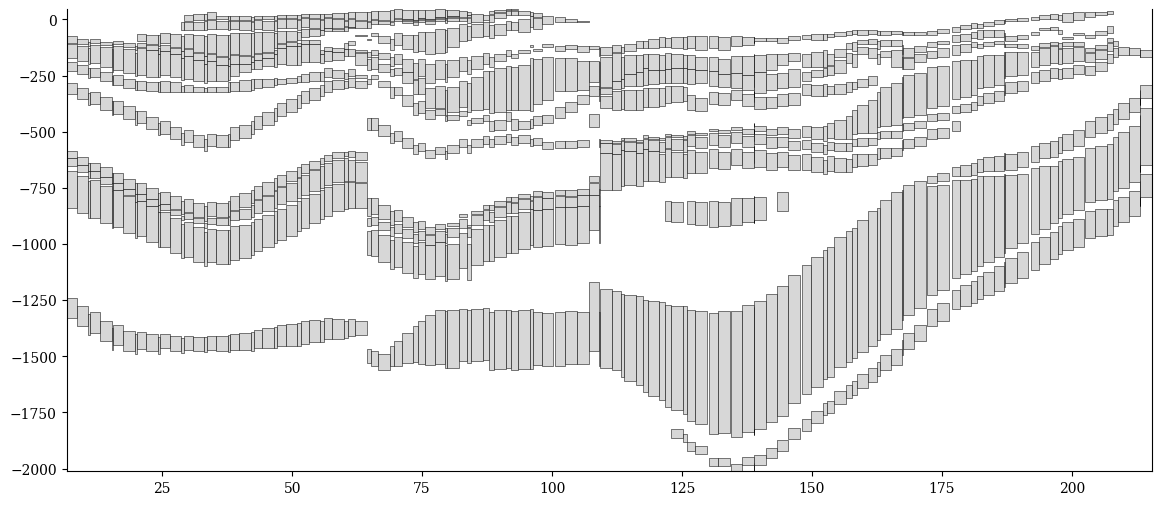

In [103]:
# -- Plot simpliest cross section
ax = xs.plot_xs()

<p style="color: #DB7093; font-size:1.2em;">🚗 <i>Customized cross section plot</i></p>

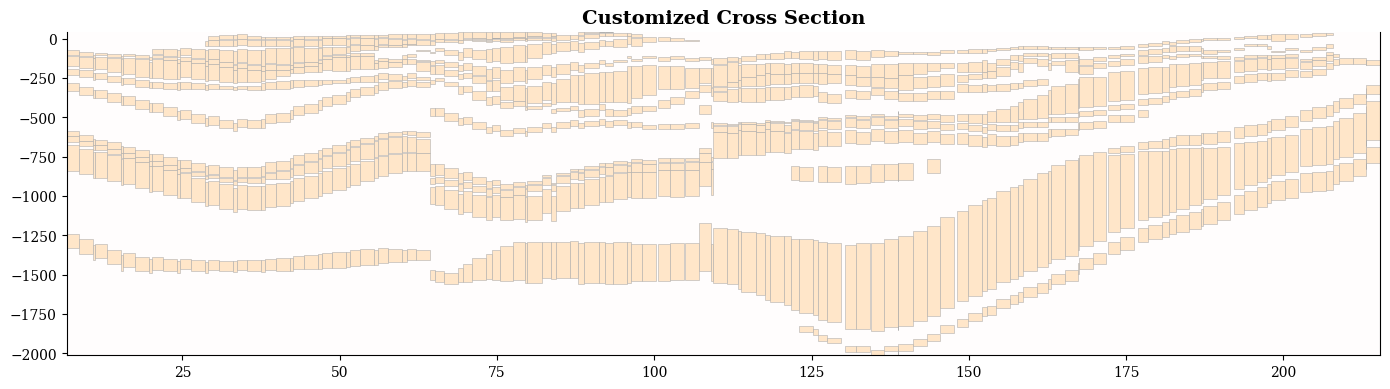

In [104]:
# -- Customized cross section plot
ax = xs.plot_xs(vertical_ratio=1/40, fc='bisque', ec='darkgrey', lw=.4, alpha=.9)

# -- Add title
ax.set_title("Customized Cross Section", fontsize=14, fontweight='bold')

# -- Manage background color
ax.patch.set_facecolor('#FFFAFA')
ax.patch.set_alpha(.22)

# -- Adjust plot
plt.tight_layout()

<p style="color: #DB7093; font-size:1.2em;">🚈 <i>Cross section plot by layers</i></p>

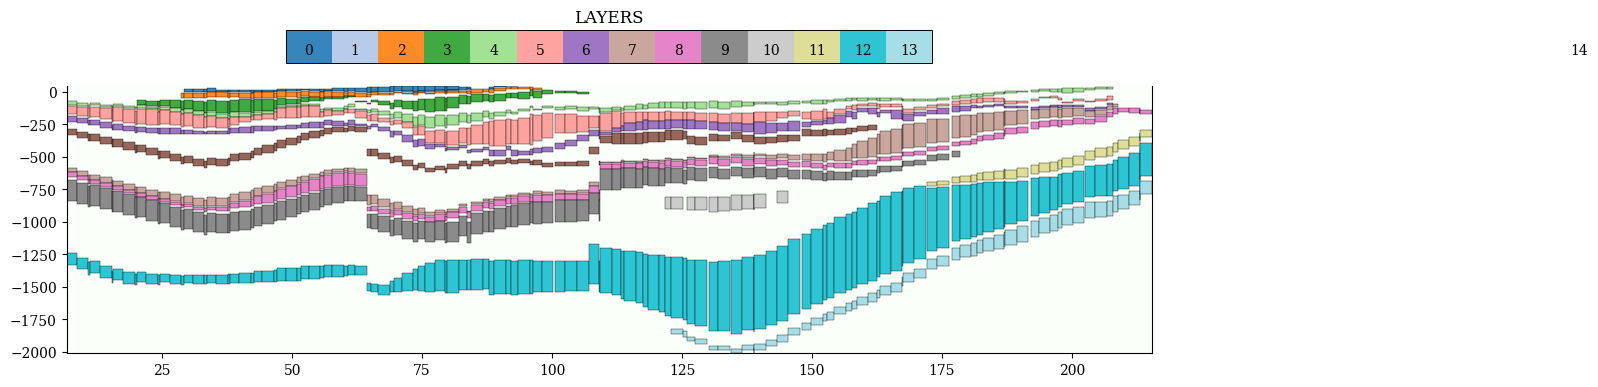

In [21]:
# -- Cross section plot by layer
ax = xs.plot_xs(vertical_ratio=1/40, lw=.3, by_layer=True)

# -- Manage background color
ax.patch.set_facecolor('#F0FFF0')
ax.patch.set_alpha(.3)

<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> the <code>by_layer=True</code> argument is still under development🔧. Graphic rendering may not be as expected!
</div>

<p style="color: #DB7093; font-size:1.2em;">🚁 <i>Cross section with field values</i></p>

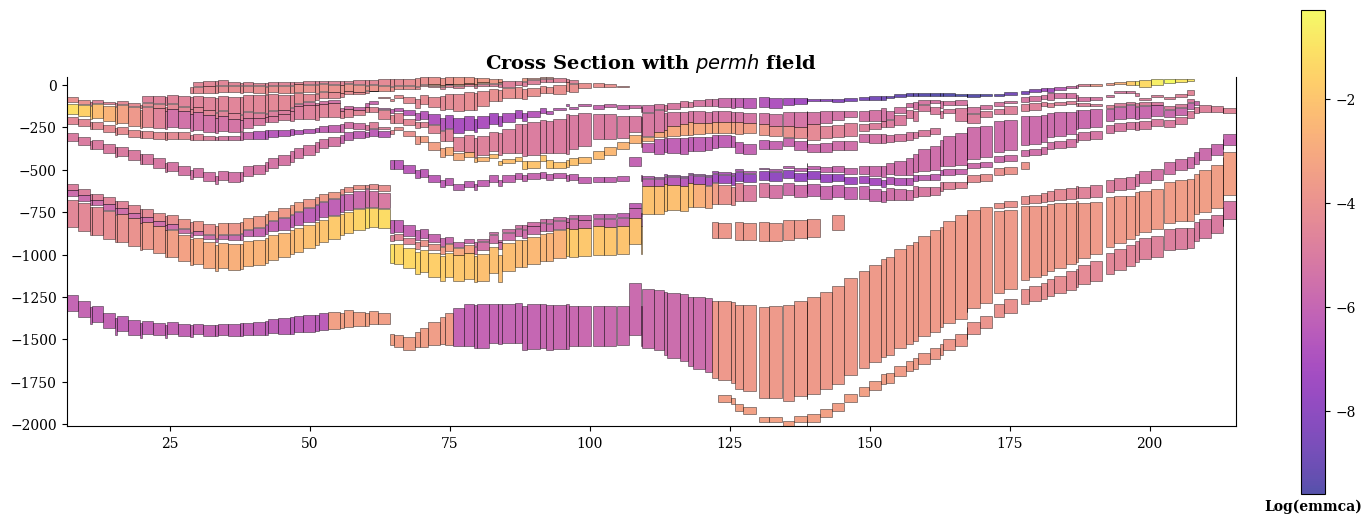

In [12]:
# -- Set colorbar opts
cb_opts = dict(fraction=.06, location='right', shrink=0.85, cmap='plasma', alpha=.7)

# -- Plot cross section filled by permh values
cb, ax = xs.plot_xs_field(field='permh', log=True, vertical_ratio=1/33,
                          cb_kwargs=cb_opts,
                          cmap='plasma',
                          alpha=.7)

# -- Manage colorbar xy-labels
ax.get_figure().axes[1].set_xlabel('Log(emmca)', fontweight='bold')
ax.get_figure().axes[1].set_ylabel('')

# -- Add title
ax.set_title('Cross Section with $permh$ field', fontsize=14, fontweight='bold')

# -- Adjust subplots
plt.tight_layout()

<p style="color: #DB7093; font-size:1.2em;">🛫 <i>Cross section with additional custom location</i></p>

When plotting along the cross section line, it can be tricky to localize ourself on the xy-dimension. Frecuently in geology, there are some key locations synmbolized by a **vertical line** to refer to a known place nearby. The `.add_location()` method
can help the user to add some of these referencing places.
There is an example below to add the city **Bordeaux, France** in a **MONA** cross section plot.

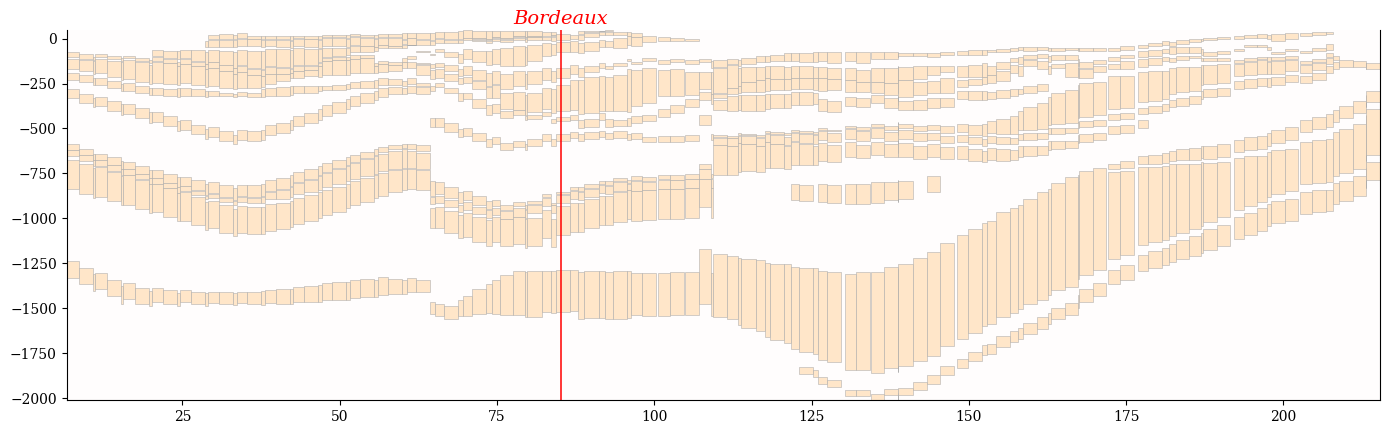

In [22]:
# -- Customized cross section plot
ax = xs.plot_xs(vertical_ratio=1/35, fc='bisque', ec='darkgrey', lw=.4, alpha=.9)

# -- Manage background color
ax.patch.set_facecolor('#FFFAFA')
ax.patch.set_alpha(.22)

# -- Add city location in plot
xs.add_location(ax, loc=(355.1, 291.2), tolerance=None,
                text_kws=dict(y=110, s='Bordeaux',
                              color='red', va='center',
                              ha='center', fontsize=14, fontstyle='italic'),
                lw=1.1, color='red')

# -- Adjust plot
plt.tight_layout()

<p style="color: #DB7093; font-size:1.2em;">🚀 <i>Cross section with addtional vertices location</i></p>

Another usefull method attached to the added locations is the `.add_vertices_locations()`. This allows plotting a vertical line on each **vertices** of the cross section line. It can sometimes explain a weird behaviour in cross section cell plot since it can correspond to a **cross line breaking point(s)** _(point in where the cross section line is changing direction)_.<br>

By default, the vertices will be named with a integer from $0$ to $N_{vertices}$. The `prefix` argument allows the user to add un a prefix before each current vertices names.

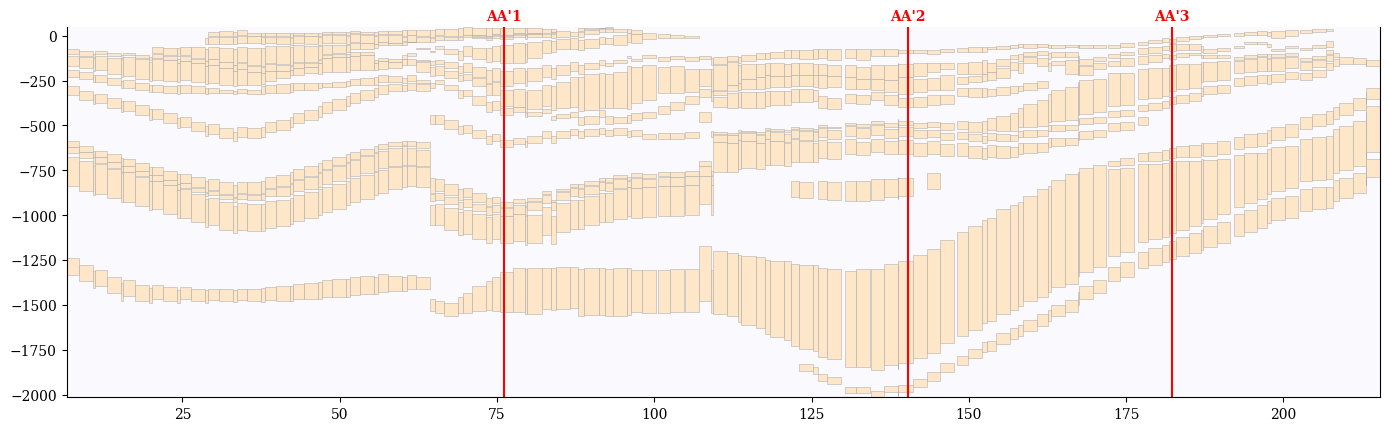

In [36]:
# -- Customized cross section plot
ax = xs.plot_xs(vertical_ratio=1/35, fc='bisque', ec='darkgrey', lw=.4, alpha=.9)

# -- Manage background color
ax.patch.set_facecolor('#E6E6FA')
ax.patch.set_alpha(.2)

# -- Customized vertices locations
xs.add_vertices_locations(
    ax,
    text_kws=dict(color='red', fontweight = 'bold'),
    color='red',
    prefix="AA'")

# -- Adjust plot
plt.tight_layout()

## 👉 The `Vtk` object

`PyMarthe` has a `Vtk` class (pymarthe.utils.vtk_utils.Vtk) based on a `MartheModel` input that can reconstruct model **3D geometry** as an **unstructured grid**. The user can get the `Vtk` instance by using the `.get_vtk()` method.

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> to use the <code>Vtk</code> facility make sure to properly install the <code><i>vtk==9.1.0</i></code> python module.
    </span>
</div>

Several usefull arguments can by provided such as:
- `vertical_exageration`: scale of vertical exageration
- `hws` : hanging wall state, flag to define whatever the superior hanging walls of the model are defined as normal layers (_explivitly_) or not (_implicitly_).
- `smooth` : enable interpolating vertex elevations based on shared cell. Default is `False`.
- `binary` : Enable binary writing
- `xml` : Enable xml based VTK files writing.
- `shared_points` :Enable sharing points in grid polyhedron construction.

In [363]:
# -- Build 3D vtk grid
vtk = mm.get_vtk(vertical_exageration=0.025,
                 smooth=False,
                 binary=True,
                 xml=False,
                 shared_points=False)

Extracting model implicit top/bottom for each layer ...

Building 3D geometry ...
[==================================================] 100%
Building vtk unstructured grid geometry ...


<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;">this operation can take a while for large models!
    </span>
</div>

In order to facilitate visualisation of the results we will use the `pyvista` and `trame` packages.

In [361]:
#!pip install pyvista
#!pip install trame

In [321]:
# -- Import additional 3D visualization tool
try:
    import pyvista as pv
except ImportError as error:
    print("Could not load `pyvista` package.")

The user can access the created **unstructured grid** by using the `.vtk_grid` attribut.
Let's plot the actual cell **connectivities** of the 3D grid.

In [362]:
# -- Build pyvista unstructured grid object
ugrid = pv.UnstructuredGrid(vtk.vtk_grid)

# -- Compute cells connectivity
conn = ugrid.connectivity()

# -- Set plot global theme
theme = pv.themes.DarkTheme()
theme.lighting = True
theme.show_edges = True
theme.edge_color = 'black'
pv.set_plot_theme(theme)

# -- Plot connectivities 3D
cmap = ListedColormap(plt.cm.tab20(np.arange(mm.nlay)))
_ = conn.plot(cmap=cmap, interactive=True, jupyter_backend='trame', zoom=1.6)

Widget(value="<iframe src='http://localhost:49994/index.html?ui=P_0x23147210a90_23&reconnect=auto' style='widt…

## 👉 Model properties 

The `MartheModel` instance contains a `.prop` attribute (_`dict`_) that will store the **Marthe** model properties. In `PyMarthe`, each model property is related to a **specific class** that provides at least `reader`, `getter`, `setter`, `writter` methods.

<br>

For now, the only supported properties are:

➤ **Distributed properties** ➔ `MartheField`<br>
&emsp;&emsp;&emsp;➼ _permh_<br>
&emsp;&emsp;&emsp;➼ _kepon_<br>
&emsp;&emsp;&emsp;➼ _emmca_<br>
&emsp;&emsp;&emsp;➼ _emmli_<br>
&emsp;&emsp;&emsp;➼ _..._<br>
    
➤ **Pumping properties** ➔ `MarthePump`<br>
&emsp;&emsp;&emsp;➼ _aqpump_<br>
&emsp;&emsp;&emsp;➼ _rivpump_<br>
    
➤ **Zonal Soil properties** ➔ `MartheSoil`<br>
&emsp;&emsp;&emsp;➼ _cap_sol_progr_<br>
&emsp;&emsp;&emsp;➼ _aqui_ruis_perc_<br>
&emsp;&emsp;&emsp;➼ _t_demi_percol_<br>
&emsp;&emsp;&emsp;➼ _ru_max_<br>
&emsp;&emsp;&emsp;➼ _..._<br>

When initiating a `MartheModel` instance, the basic _permh_ property is always loaded. To load another property, consider using the `.load_prop()` method.
Let's manipulate the available model properties!

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> Each property will be detailed in this guide as they form the basis of the hydrodynamic model. 
    </span>
</div>

In [368]:
# -- Show initial loaded properties
mm.prop

{'permh': <pymarthe.mfield.MartheField at 0x2308d1400a0>}

<p style="color:#26c9fc; font-size:1.2em;">💧<i>Hydraulic distributed properties</i></p>

In [369]:
# -- Load some hydraulic distributed properties like (emmca, emmli, kepon)
props = ['emmca', 'emmli', 'kepon']
for prop in props:
    mm.load_prop(prop)

# -- Show loaded properties
mm.prop

{'permh': <pymarthe.mfield.MartheField at 0x2308d1400a0>,
 'emmca': <pymarthe.mfield.MartheField at 0x23080f13490>,
 'emmli': <pymarthe.mfield.MartheField at 0x230909d0790>,
 'kepon': <pymarthe.mfield.MartheField at 0x23080f11750>}

<p style="color:#26c9fc; font-size:1.2em;">💧<i>Pumping properties</i></p>

In [372]:
# -- Load some hydraulic pumping properties like (aqpump, rivpump)
mm.load_prop('aqpump', verbose=False)

# -- Show loaded properties
mm.prop

{'permh': <pymarthe.mfield.MartheField at 0x2308d1400a0>,
 'emmca': <pymarthe.mfield.MartheField at 0x23080f13490>,
 'emmli': <pymarthe.mfield.MartheField at 0x230909d0790>,
 'kepon': <pymarthe.mfield.MartheField at 0x23080f11750>,
 'aqpump': <pymarthe.mpump.MarthePump at 0x23318b70bb0>}

The model properties work **dynamically**: there is no need to load all of them and they can be deleted _one-by-one_.

In [378]:
# -- Delete emmca, emmli & aqpump properties from .props
for prop in ['emmca', 'emmli', 'aqpump']:
    del mm.prop[prop]

# -- Show loaded properties
mm.prop

{'permh': <pymarthe.mfield.MartheField at 0x2308d1400a0>,
 'kepon': <pymarthe.mfield.MartheField at 0x23080f11750>}

## 👉 Model execution

`MartheModel` instance provides some built-in methods to control the model execution.

### ☛ Time window

All transient **Marthe** models are defined by a specific **time window** divided in $N$ time steps. By default, **Marthe** consider all time steps, the resulting time window is $(t_0,\space t_N)$. In **Marthe** the **time window** control is set as a global parameter in `.mart` file.<br>

Sometimes, the modeller wants to focus on a specific period of time and has no need to execute the model on the entire **time window**. Let's give a example of _reducing_ / _increasing_ the model **time window**.

In [4]:
# -- Show actual time window
mm.get_time_window()

(Timestamp('1972-12-31 00:00:00'), Timestamp('2011-12-31 00:00:00'))

In [8]:
# -- Print the corresponding configuration block in .mart file
!sed -n -e 33p -e 36p monav3/mona.mart

         10=Nombre maxi possible de Pas de temps de Modèle en Transitoire [Def=Tous]
         0=Numéro du pas de temps (réel) pour un Re-démarrage [Défaut=0]


In [17]:
# -- Set new time window from timestep number
mm.set_time_window(start=10, end=20)

# -- Print the corresponding configuration block in .mart file
!sed -n -e 33p -e 36p monav3/mona.mart

==> Model time window had been set from istep 10 to 20 successfully. 
         20=Nombre maxi possible de Pas de temps de Modèle en Transitoire [Def=Tous]
         10=Numéro du pas de temps (réel) pour un Re-démarrage [Défaut=0]


Even if, in `.mart` file the **time window bounds** are written as time step numbers (`int`), the `set_time_window()` method allows the user to provide the corresponding **dates** of the target timesteps.

In [18]:
# -- Set new time window from dates
mm.set_time_window(start=0, end='2011/12/31')

# -- Print the corresponding configuration block in .mart file
!sed -n -e 33p -e 36p monav3/mona.mart

==> Model time window had been set from istep 0 to 39 successfully. 
         39=Nombre maxi possible de Pas de temps de Modèle en Transitoire [Def=Tous]
         0=Numéro du pas de temps (réel) pour un Re-démarrage [Défaut=0]


<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> reducing the time window of the model will <b>absolutly not modify</b> the <code>.pastp</code>.
    </span>
</div>

### ☛ Hydrodynamic calculation periodicity

By default, in **Marthe**, the **hydrodynamic calculation** is performed at each time steps. For models with a very large number of time steps, this can sometimes become restrictive for certain manipulations. The **Marthe** models allow the modeler to choose the time steps for which he wishes to perform a hydrodynamic calculation.<br>

There are several ways to _activate_ / _desactivate_ a **hydrodynamic calculation** in **Marthe**. The most commun way corresponds to an additional line in the **time step** blocks of the `.pastp` file in which an _"action"_ (or _"trigger"_) is performed, followed by an integer between $-1$ and $2$.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;➥ `0` : **No action** _(Default)_<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;➥ `1` : **Activation** _(calculating hydrodynamics from this time step)_<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;➥ `-1` : **Deactivation** _(No more hydrodynamic calculations after this time step)_<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;➥ `2` : **Single Activation** _(activate hydrodynamic calculations only for this specific time step, then automatic deactivation)_<br>

<br>

<details>
  <summary style="font-size: 16px; color: green;"><li><i>Example</i></li></summary>
    <p style="color: #5e7179;"><i>Extract of <code>.pastp</code> file</i></p>
    <div style="background-color: OldLace; padding: 15px;">
        <p style="font-family: Lucida Console, Monaspace; font-size: 14px; color: black;">
          MULTICOUCHE NORD AQUITAIN - VERSION 2KM FEVRIER 2010 - MONA V33-2007<br>
          <span>*** Début de la simulation à la date :</span> 31/12/1972 ; ***<br>
          /DEBIT/LISTM N: ./mona.deb/mona1972.txt<br>
         <span style="background-color: yellow;">/CALCUL_HDYNAM/ACTION I= 0;</span><br>
          /FLPLU/ZONEP Z= 101V= 120.0;<br>
          ...
        </p>
      </div>
</details>



`MartheModel` instance provides a specific _easy-to-use_ method to carry out the **hydrodynamic calculation** settings. Let's try it out on **Lizonne** model (daily time step).

In [2]:
# -- Load Lizonne model
liz = MartheModel(lizonne_ws)
print(f"Number of time steps: {liz.nstep}.")
print(f"Time steps frequence: '{liz.mldates.inferred_freq}'.")

# -- Set new .pastp file to not overwrite the original one
new_pastp = lizonne_ws.replace('.rma', '_new.pastp')

Number of time steps: 5845.
Time steps frequence: 'D'.


In [3]:
# -- Activate hydrodynamic calculation for time steps
liz.set_hydrodyn_periodicity(istep='all', new_pastpfile=new_pastp)

# -- Let's see the first 13 pastp lines
!head lizonnev2/Lizonne_new.pastp -n 13

==> Hydrodynamic computation periodicity had been set successfully in 'lizonnev2\Lizonne_new.pastp'
Modèle Lizonne 2021 - EAUX-SCARS
 #<V7.8a># --- Fin du texte libre --- ; Ne pas modifier/retirer cette ligne
 *** Début de la simulation    à la date : 31/07/2003 ; ***
  /DEBIT_RIVI/EDITION      I= 1;L= 0;F= 0;B= 0;
  /QECH_RIV_NAPP/EDITION   I= 1;
  /RUISSEL/EDITION         I= 1;Z= 0;C= 0;
  /DEBIT_DEBORD/EDITION    I= 1;
  /CHARGE/EDITION          I= 1;
  /DEBIT_RESID/EDITION     I= 1;
  /%SATURAT/EDITION        I= 1;
  /RECHARGE/ZONE_CLIM      Z=      *V=       0.2;
  /CALCUL_HDYNAM/ACTION    I= 1;
  /*****/***** Fin de ce pas


In [4]:
# -- Desctivate all hydrodynamic calculation
liz.set_hydrodyn_periodicity(istep='none', new_pastpfile=new_pastp)

# -- Let's see the first 13 pastp lines
!head lizonnev2/Lizonne_new.pastp -n 13

==> Hydrodynamic computation periodicity had been set successfully in 'lizonnev2\Lizonne_new.pastp'
Modèle Lizonne 2021 - EAUX-SCARS
 #<V7.8a># --- Fin du texte libre --- ; Ne pas modifier/retirer cette ligne
 *** Début de la simulation    à la date : 31/07/2003 ; ***
  /DEBIT_RIVI/EDITION      I= 1;L= 0;F= 0;B= 0;
  /QECH_RIV_NAPP/EDITION   I= 1;
  /RUISSEL/EDITION         I= 1;Z= 0;C= 0;
  /DEBIT_DEBORD/EDITION    I= 1;
  /CHARGE/EDITION          I= 1;
  /DEBIT_RESID/EDITION     I= 1;
  /%SATURAT/EDITION        I= 1;
  /RECHARGE/ZONE_CLIM      Z=      *V=       0.2;
  /CALCUL_HDYNAM/ACTION    I= -1;
  /*****/***** Fin de ce pas


In [19]:
# -- Activate hydrodynamic calculation sequentially (annually)
liz.set_hydrodyn_periodicity(istep='::365', new_pastpfile=new_pastp)

# -- Let's see the all actions lines
!grep '/CALCUL_HDYNAM/ACTION    I= 2;' lizonnev2/Lizonne_new.pastp

==> Hydrodynamic computation periodicity had been set successfully in 'lizonnev2\Lizonne_new.pastp'
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;


In [25]:
# -- Activate hydrodynamic calculation sequentially (annually)
liz.set_hydrodyn_periodicity(istep='::365', new_pastpfile=new_pastp) # start:end:step

# -- Let's see the all actions lines
!grep '/CALCUL_HDYNAM/ACTION    I= 2;' lizonnev2/Lizonne_new.pastp

==> Hydrodynamic computation periodicity had been set successfully in 'lizonnev2\Lizonne_new.pastp'
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;


In [27]:
# -- Activate hydrodynamic calculation on specific time steps
liz.set_hydrodyn_periodicity(istep=np.arange(5), new_pastpfile=new_pastp) # 5 first time steps

# -- Let's see the all actions lines
!grep '/CALCUL_HDYNAM/ACTION    I= 2;' lizonnev2/Lizonne_new.pastp

==> Hydrodynamic computation periodicity had been set successfully in 'lizonnev2\Lizonne_new.pastp'
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;
  /CALCUL_HDYNAM/ACTION    I= 2;


<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"><b>Marthe</b> also allows an external writing mode for the activation periodicity of hydrodynamic calculations. This involves pointing to an external text file in wich each line (=  number of time steps) contains an integer <code>0</code> or <code>2</code>. This reduces the size of the <code>.pastp</code> file. To do so, in <code>pymarthe</code>, the user can set <code>external=True</code> (the external file will have the default name <i>calcul_hydro.txt</i>) or directly give the name of the external file by setting <code>external='filename.txt'</code>.
    </span>
</div>

### ☛ Run model

The `MartheModel` instance has the ability to **run** the provided model directly from python with the method `.run_model()` as long as the user provide the correct path to the **[Marthe executable](https://www.brgm.fr/fr/logiciel/marthe-logiciel-modelisation-ecoulements-souterrains)**.

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;">if the <b>Marthe</b> executable path is already in your environement variables of your computer, there is no need to provided the full path, the executable name is enough!
    </span>
</div>

In [381]:
# -- Launch model run
#mm.run_model(exe_name=EXE_NAME, silent=True, verbose=False) # keep commented

<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> the <b>MONA</b> model is a large regional model whose complete execution can take from a <i>few minutes</i> to <i>tens of minutes</i>, depending on the user's machine. That is the reason why we <strong>won't be running the model</strong> in this guide <i>(the model's outputs are already available in the <code>monav3</code> folder).
    </span>
</div>

After running the model, the user can easily print on screen the information about **execution times** of all main processes by using the `.show_run_times()` method.

In [380]:
# -- Get run times summary
mm.show_run_times()

Process                               CPU time
----------------------------------  ----------
Calcul des charges                     04m 36s
Bilans des débits                          01s
Bilans des débits/zon                  01m 50s
Sauvega. des grilles                       12s
Bilans climatolog.                         00s
Routage rivières                           00s
Solveur hydrodynamique                 03m 03s
Calcul total (hors initialisation)     06m 43s
Calcul total                           06m 44s


# 🎇 **`MartheField` instance** 🎇

The `MartheFiled` instance was created to manage **Marthe** gridded/field data. It generally instantialized with a **Marthe grid file** such as:

+ _`.permh`_: permeability field
+ _`.emmca`_: captive storage
+ _`.emmli`_: free storage
+ ...

These files are organized as a succession of **unitary grids** divided into 3 sections:<br>

&emsp;&emsp;➼ **[Infos]**: given the grid position in the model _(field name, layer id, nested grid id, ...)_<br>
&emsp;&emsp;➼ **[Structure]**: given the unitary grid structure _(xy coordinate of the lower left corner, number of rows, number of columns, ...)_<br>
&emsp;&emsp;➼ **[Data]**: given the values for each cell in the grid<br>

In [53]:
# -- Print first lines of .permh grid files
!head monav3/mona.permh -n 21

Marthe_Grid Version=9.0 
Title=Travail                                                        permh            1
[Infos]
Field=permh
Type=
Elem_Number=0
Name=
Time_Step=-9999
Time=0
Layer=1
Max_Layer=15
Nest_grid=0
Max_NestG=0
[Structure]
X_Left_Corner=284.5
Y_Lower_Corner=156.0
Ncolumn=148
Nrows=128
[Data]
0 	0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	101	102	103	104	105	106	107	108	109	110	111	112	113	114	115	116	117	118	119	120	121	122	123	124	125	126	127	128	129	130	131	132	133	134	135	136	137	138	139	140	141	142	143	144	145	146	147	148	
0 	 0 	285.5	287.5	289.5	291.5	293.5	295.5	297.5	299.5	301.5	303.5	305.5	307.5	309.5	311.5	313.5	315.5	317.5	319.5	321.5	323.5	325.5	327.5	329.5	331.5	333.5	335.5	337.5	339.5	341.5	343.5	345.5	347.5	34

To load the entire field, `PyMarthe` will iterativly read each single grids and store them into a tuple of `MartheGrid` instances.

In [57]:
# -- Read unitary grids
mgrids = marthe_utils.read_grid_file(mm.mlfiles['permh'])
mgrids

(<pymarthe.utils.grid_utils.MartheGrid at 0x167982d8220>,
 <pymarthe.utils.grid_utils.MartheGrid at 0x167983aa020>)

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> remember that a <code>MartheGrid</code> instance is consider <i>"Main Grid"</i> if <code>.inest=0</code>.
    </span>
</div>

In [62]:
# -- Print some single grid informations
print('Field: ', mgrids[0].field)
print('Related layer id: ', mgrids[0].layer)
print('Related nested id: ', mgrids[0].inest)
print('Number of rows: ', mgrids[0].nrow)
print('Number of columns: ', mgrids[0].ncol)
print('Grid extension (x-oriented): ', mgrids[0].Lx)
print('Grid extension (y-oriented): ', mgrids[0].Ly)
print('Is it a nested grid?: ', mgrids[0].isnested)
print('Is it a regular grid?: ', mgrids[0].isregular)
print('Is it a uniform grid?: ', mgrids[0].isuniform)
print('Grid data: ', mgrids[0].array)

Field:  permh
Related layer id:  0
Related nested id:  0
Number of rows:  128
Number of columns:  148
Grid extension (x-oriented):  296.0
Grid extension (y-oriented):  256.0
Is it a nested grid?:  True
Is it a regular grid?:  True
Is it a uniform grid?:  False
Grid data:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


The `MartheField` class constructor will **extract** and **assemble** all **unitary grids** into a single instance.

<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> it has been identified that some versions of the <b>Marthe</b> executable <b>do not write grid headers correctly</b> (<i><b>[Infos]</b> section</i>). In that case, an error message will be displayed, and it is up to the modeler to manually fix the headers.
</div>

## 👉 Basic loading & attributes

All single **Marthe grid data** for a specific field will be concatenate into a single `numpy recarray` with usefull informations such as `layer`, `inest`, `i`, `j`, `x`, `y`, `value`.

The `use_imask` argument in the `MartheField` constructor allows the user to mask his field with the model `.imask` if required. In other words, if `use_imask=True` only field data on layer active domain will be considered _(works as model related field)_.
But if `use_imask=False`, all field data will be considered including masked values ($0$, $9999$, $8888$, $...$) to build _active_ / _inactive_ domains _(works as independent field)_.<br>

There are 2 ways to load a `MartheField` instance:<br>
&emsp;&emsp;➤ **externally**: using the `MartheModel` constructor<br>
&emsp;&emsp;➤ **internally**: using the `MartheModel.load_prop()` method

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> an <b>independent</b> field contains both the field data and active domain <i>(geometry)</i>
        when a <b>dependent</b> field only contains data on active hydraulic model domain.
    </span>
</div>

In [63]:
# -- Build MartheField instance externaly (permh)
mf = MartheField(field='permh', data=mm.mlfiles['permh'], mm=mm, use_imask=True)

# -- Show MartheField object
mf

In [64]:
# -- Load MartheField instance from a parent MartheModel instance property
mm.load_prop('permh')

# -- Show MartheField object
mm.prop['permh']

## 👉 `Getters` & `Setters`

`MartheField` instance has a very flexible `getters` / `setters` (arguments can be _numeric_ or _iterables_) to subset and set data easily.<br>

To get all or a subset of a `MartheField` instance, consider using the `.get_data()` method.

In [65]:
# -- Get all data
mf.get_data() # mf.data

rec.array([( 0, 0,   0,   0, 285.5, 411., 0.),
           ( 0, 0,   0,   1, 287.5, 411., 0.),
           ( 0, 0,   0,   2, 289.5, 411., 0.), ...,
           (14, 0, 127, 145, 575.5, 157., 0.),
           (14, 0, 127, 146, 577.5, 157., 0.),
           (14, 0, 127, 147, 579.5, 157., 0.)],
          dtype=[('layer', '<i8'), ('inest', '<i8'), ('i', '<i8'), ('j', '<i8'), ('x', '<f8'), ('y', '<f8'), ('value', '<f8')])

In [66]:
# -- Subset by single layer id
mf.get_data(layer=0)

rec.array([(0, 0,   0,   0, 285.5, 411., 0.),
           (0, 0,   0,   1, 287.5, 411., 0.),
           (0, 0,   0,   2, 289.5, 411., 0.), ...,
           (0, 0, 127, 145, 575.5, 157., 0.),
           (0, 0, 127, 146, 577.5, 157., 0.),
           (0, 0, 127, 147, 579.5, 157., 0.)],
          dtype=[('layer', '<i8'), ('inest', '<i8'), ('i', '<i8'), ('j', '<i8'), ('x', '<f8'), ('y', '<f8'), ('value', '<f8')])

In [69]:
# -- Subset by multiple layer ids
mf.get_data(layer=np.arange(5)) # accept any iterable (list, tuple, nd.array, pd.Series, ...)

rec.array([(0, 0,   0,   0, 285.5, 411., 0.),
           (0, 0,   0,   1, 287.5, 411., 0.),
           (0, 0,   0,   2, 289.5, 411., 0.), ...,
           (4, 0, 127, 145, 575.5, 157., 0.),
           (4, 0, 127, 146, 577.5, 157., 0.),
           (4, 0, 127, 147, 579.5, 157., 0.)],
          dtype=[('layer', '<i8'), ('inest', '<i8'), ('i', '<i8'), ('j', '<i8'), ('x', '<f8'), ('y', '<f8'), ('value', '<f8')])

In [ ]:
# -- Subset by layer & nested ids
mf.get_data(layer=[1, 5, 6, 8], inest=0)  # MONA model isn't nested

By default, the `.get_data()` method return a subset of the entire `rec.array`. But, the user has also the possibility to set `as_mask=True` to only extract the **boolean mask** of a given subset.

In [71]:
# -- Masking subset
mf.get_data(layer=[1, 5, 6, 8], as_mask=True)

array([False, False, False, ..., False, False, False])

Another useful thing is to set `as_array=True`, it will reconstruct the `numpy` _3D-array_ with shape _(layer, row, col)_. Moreover, to convert all the data into _3D-array_, consider using the method `as_3darray()`. It's a simple _wrapper_ to `.get_data(inest=0, as_array=True)` with additional checks.

In [80]:
# -- Get data as 3D-array
arr = mf.get_data(layer=0, as_array=True)
print('Array shape:\n', arr.shape)
print('Array values:\n', arr)

Array shape:
 (1, 128, 148)
Array values:
 [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [82]:
# -- Convert field rec.array to 3D-array
arr = mf.as_3darray()
print('Array shape:\n', arr.shape)
print('Array values:\n', arr)

Array shape:
 (15, 128, 148)
Array values:
 [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0

<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> setting <code>as_array=True</code> or using the <code>.as_3darray()</code> method are not available for <b>nested models</b>!
</div>

To set all or a subset of a `MartheField` instance, consider using the `.set_data()` method.
The `setter` accepts sevral objects as input:


&emsp;&emsp;➼ **Marthe grid file**: path to a model grid file (_mona.permh_)<br>
&emsp;&emsp;➼ **`rec.array`**: whole data with correct format (_layer_, _inest_, ...)<br>
&emsp;&emsp;➼ **3D-array**: an `numpy` array with dimension  _(nlay, nrow, ncol)_ (only available for structured models)<br>

In [88]:
# ---- Set the entire recarray
rec = mf.get_data()
mf.set_data(rec)

In [89]:
# ---- Set same value for all layers
mf.set_data(2.3e-4)

# -- Show existing values
np.unique(mf.get_data()['value'])

array([0.     , 0.00023])

In [90]:
# ---- Set data by value on 1 layer
mf.set_data(7.8e-3, layer=9)

# -- Show existing values
np.unique(mf.get_data(layer=9)['value'])

array([0.    , 0.0078])

In [91]:
# ---- Set data by value on layer and inest
mf.set_data(5.3e-4, layer=2, inest=0)

# -- Show existing values
np.unique(mf.get_data(layer=2)['value'])

array([0.     , 0.00053])

In [92]:
# ---- Set data from a 3D-array
arr3d = mf.as_3darray()
arr3d[arr3d != 0] = 3.2e-4
mf.set_data(arr3d)

# -- Show existing values
np.unique(mf.get_data()['value'])

array([0.     , 0.00032])

The `MartheField` instance can also **(re-)build** basic `MartheGrid` instances as ordered list from data using the `to_grids()` methods.

In [101]:
# -- Get subset data as grids
for i, mg in enumerate(mf.to_grids(layer=np.arange(5), inest=0)):
    print(f"MartheGrid n°{i}: field={mg.field}, layer={mg.layer}, inest={mg.inest}, mean_value: {mg.array.mean():.6f}")

MartheGrid n°0: field=permh, layer=0, inest=0, mean_value: 0.000049
MartheGrid n°1: field=permh, layer=1, inest=0, mean_value: 0.000038
MartheGrid n°2: field=permh, layer=2, inest=0, mean_value: 0.000053
MartheGrid n°3: field=permh, layer=3, inest=0, mean_value: 0.000068
MartheGrid n°4: field=permh, layer=4, inest=0, mean_value: 0.000066


## 👉 Visualize field data

The `MartheField` instance brings a internal `.plot()` method to visualize gridded data values. The user can determine wich layer has to be plotted (1 layer for each plot call). There are several _build-in_ arguments to make prettier plots, let's dig deeper into them.

In [108]:
# -- Reset previous changes
mm.load_prop('permh')
mf = mm.prop['permh']

<p style="color: #DB7093; font-size:1.2em;">🚲 <i>Basic field plot</i></p>

<Axes: >

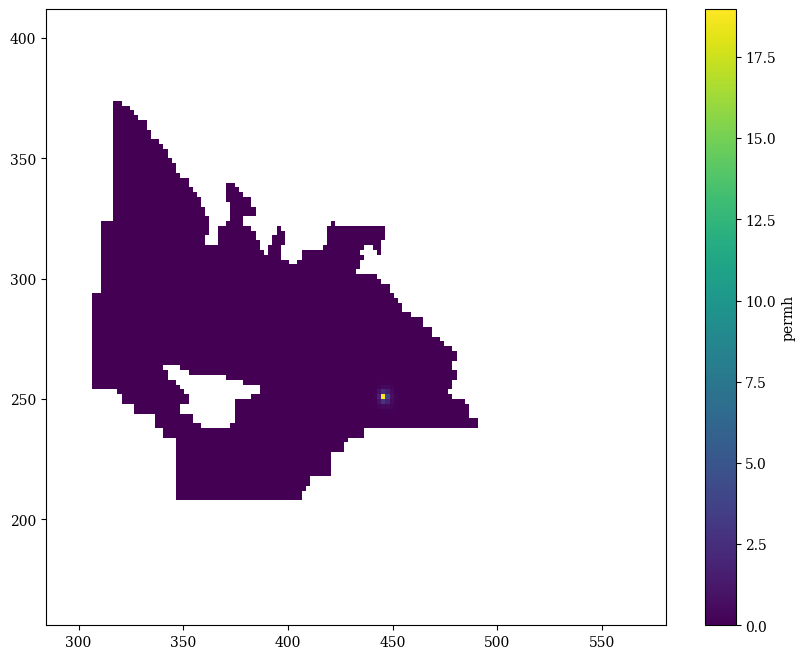

In [116]:
mf.plot(layer=4)

<p style="color: #DB7093; font-size:1.2em;">🚗 <i>Apply log-transformation</i></p>

<Axes: >

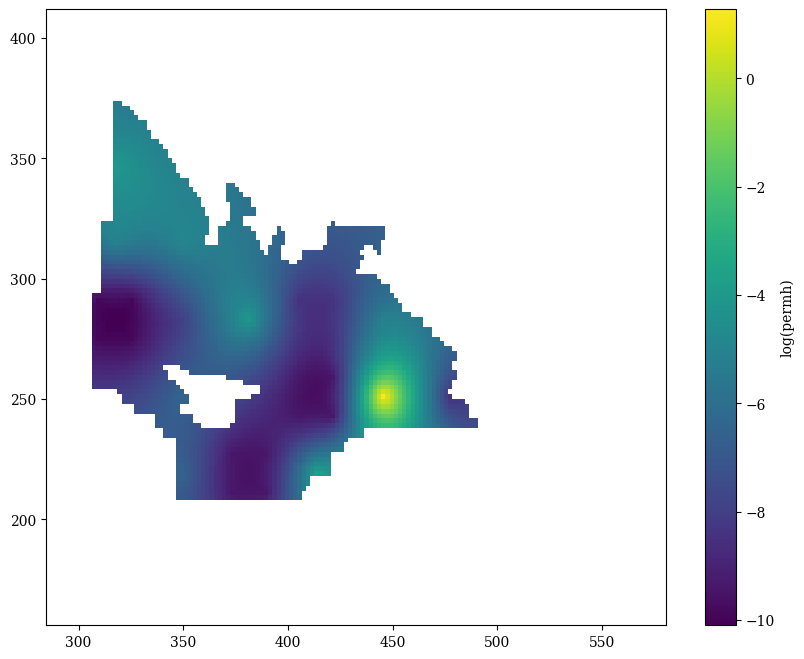

In [114]:
mf.plot(layer=4, log=True)

<p style="color: #DB7093; font-size:1.2em;">🚈 <i>Customize colors and grid cell shape</i></p>

<Axes: >

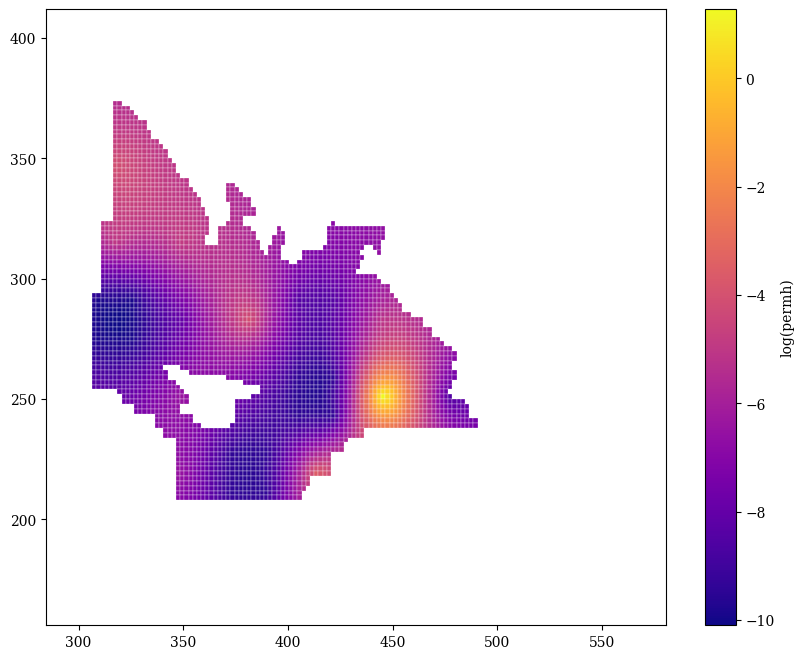

In [113]:
mf.plot(layer=4, log=True, ec='white', lw=.2, cmap='plasma')

Text(515, 375, 'INACTIVE ZONE')

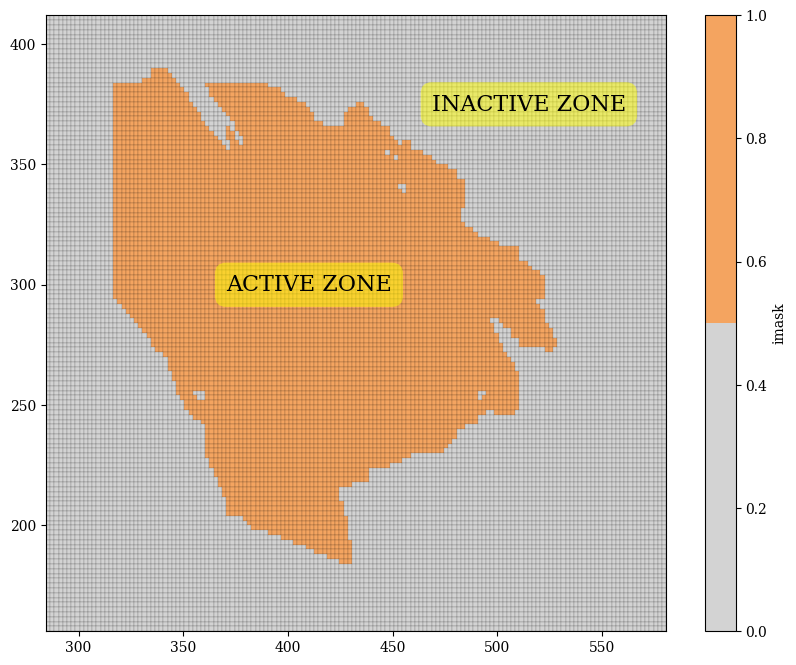

In [197]:
# -- Plot active cells of layer 9
ax = mm.imask.plot(layer=9, ec='black', lw=.1, masked_values=[],
                   cmap=ListedColormap(['lightgrey', '#F4A460']))

# -- Add active / inactive annotation
bbox_opts = dict(facecolor='yellow', ec='none', boxstyle='round', alpha=.5, pad=.5)
ax.text(410, 300, 'ACTIVE ZONE', ha='center',
        va='center', fontsize=16, bbox=bbox_opts)
ax.text(515, 375, 'INACTIVE ZONE', ha='center', va='center',
        fontsize=16, bbox=bbox_opts)

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> the <code>masked_values</code> argument can be used to avoid some specific field values to be consider in the plot. By default, it takes the <i>default masked values</i> (<code>.dmv</code>) but by filling with  <code>masked_values=[]</code> the user can enable all values to be plotted (including <i>0, 9999, -9999</i>).
    </span>
</div>

<p style="color: #DB7093; font-size:1.2em;">🚁 <i>Control & customize whole figure</i></p>

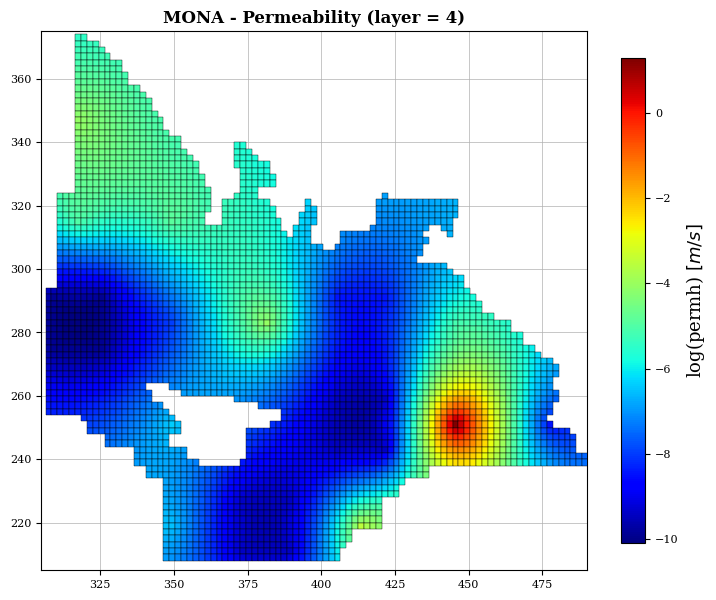

In [132]:
# -- Set matplotlib font
plt.rc('font', family='serif', size=8)

# -- Prepare figure
fig, ax = plt.subplots(figsize=(11, 7))

# -- Set extent (zoom)
extent = (305, 205, 490, 375)

# -- draw plot
ax = mf.plot(ax=ax, layer=4, log=True, extent=extent,
             ec='black', lw=.3, cmap='jet', zorder=10)

# -- Add title
ax.set_title('MONA - Permeability (layer = 4)', fontsize=12, fontweight='bold')

# -- Add background grid
ax.grid('lightgrey', lw=0.5, zorder=50)

# -- Recreate prettier colorbar
fig.delaxes(fig.axes[1])
cb = fig.colorbar(ax.collections[0], shrink=0.9)
cb.set_label('log(permh) $[m/s]$', size=13)

<p style="color: #DB7093; font-size:1.2em;">🛫 <i>Multi-layer subplots</i></p>

Text(0.5, 0.9, 'MONA v.3 - Permability field')

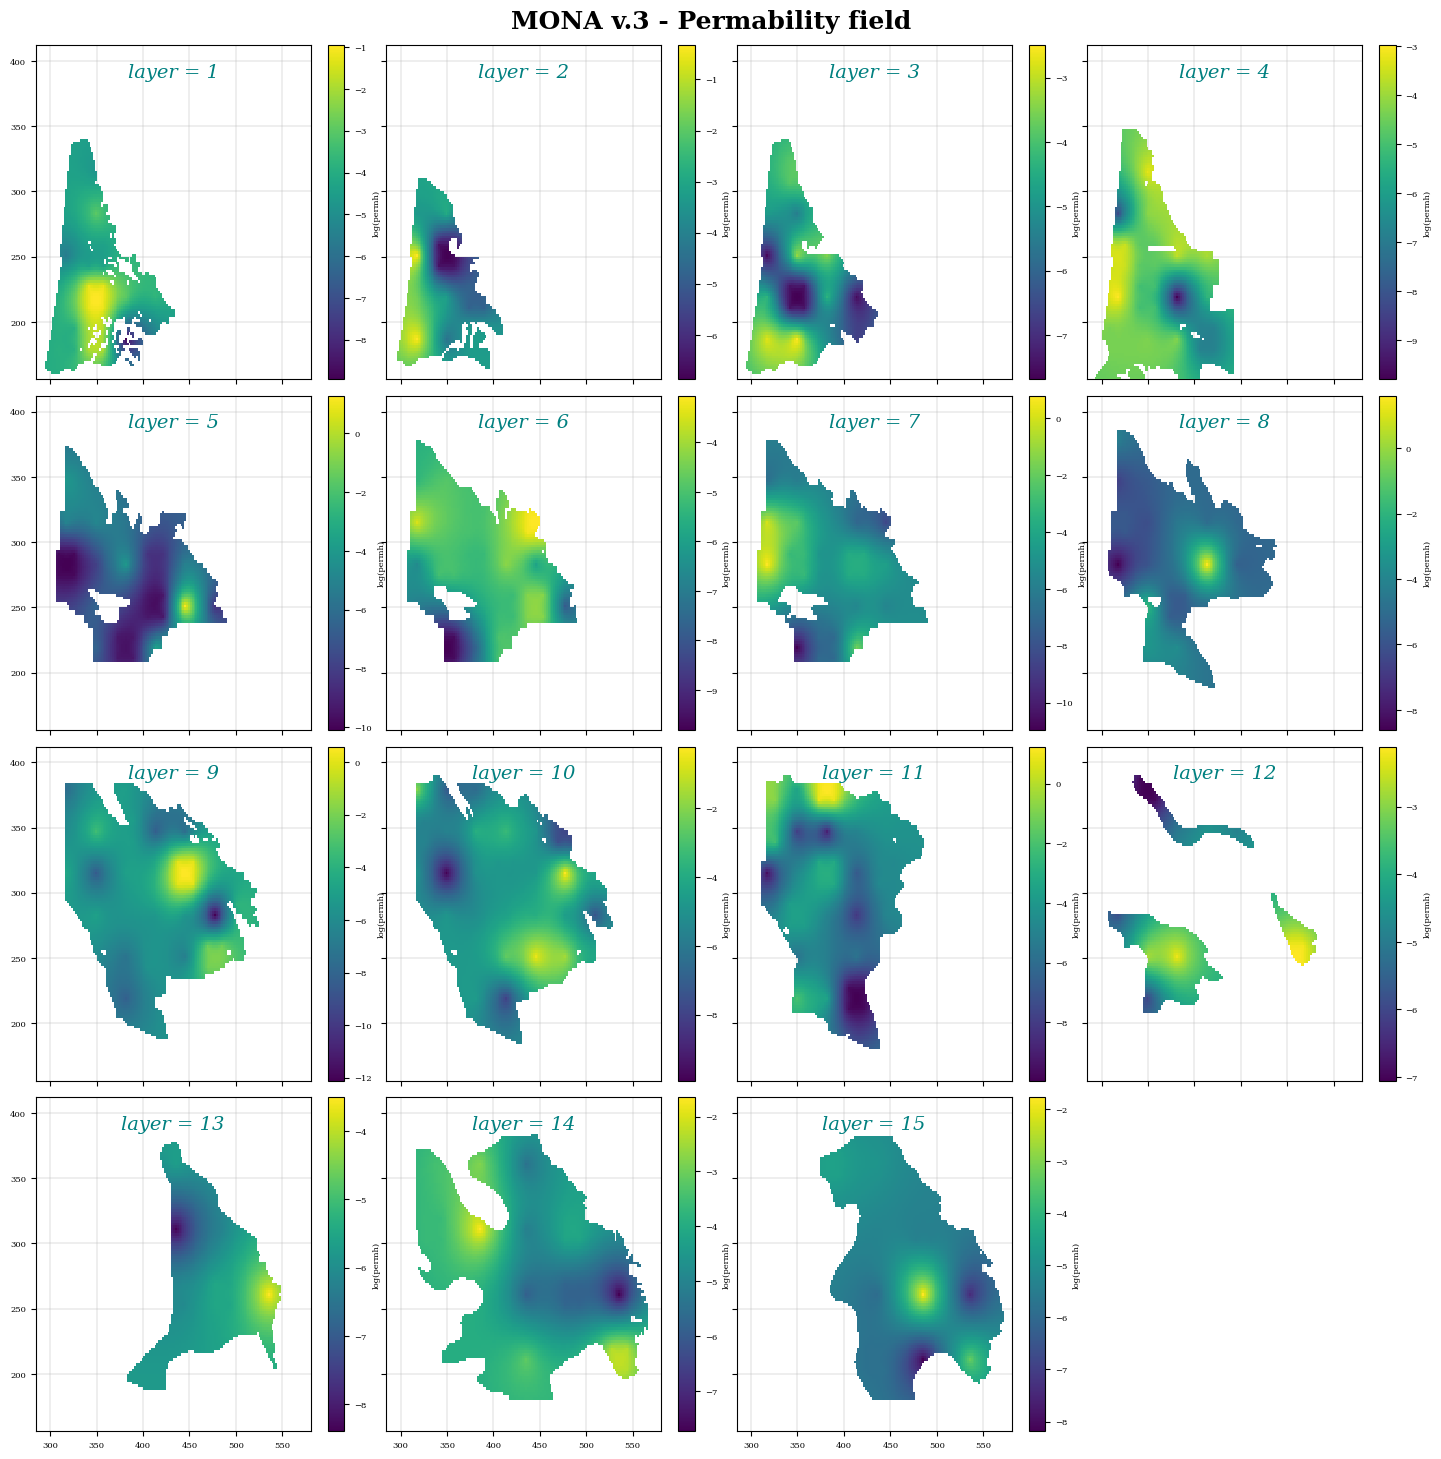

In [199]:
# -- Set matplotlib font
plt.rc('font', family='serif', size=6)

# -- Prepare figures & subplots
fig, axs = plt.subplots(figsize=(18, 18), nrows=4, ncols=4,
                        sharex=True, sharey=True,
                        gridspec_kw={'wspace': 0.02, 'hspace': 0.05})

# -- Iterate over all layers
for ilay, iax in zip(range(mm.nlay), axs.ravel()[:-1]):
    # -- Basic field plot
    ax = mf.plot(ax=iax, layer=ilay, log=True, zorder=10)
    # -- Add title
    ax.set_title(f'layer = {ilay + 1}', x=0.5, y=.88, color='#008080',
                 fontsize=14, fontstyle='italic', zorder=60)
    # -- Add grid
    ax.grid('lightgrey', lw=0.3, zorder=50)

# -- Remove last plot axis
axs[-1, -1].set_axis_off()

# -- Add main title 
fig.suptitle('MONA v.3 - Permability field',
             y=0.90, fontsize=18, fontweight="bold")

## 👉 Sampling field

To get field data at a specific locations on model domain, the user can use the `.sample()` method. This will use the existing **spatial index** in parent `MartheModel` instance  and request the given _xy-coordinates_ spatially.

Text(0.5, 1.0, 'Sampling points')

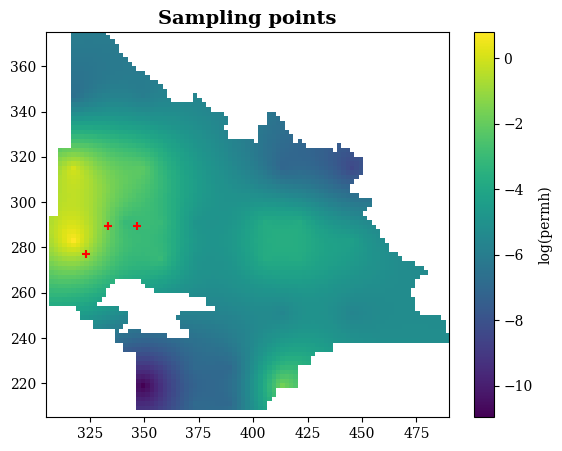

In [226]:
# -- Set xy-points
x, y= [323.1, 333.4, 346.7], [277.11, 289.3, 289.5]

# -- Plot sampling points
fig, ax = plt.subplots(figsize=(6.5, 5))
ax = mf.plot(ax=ax, layer=6, log=True, extent=(305, 205, 490, 375))
ax.scatter(x, y, s=40, c='r',   marker = '+')
ax.set_title('Sampling points', fontsize=14, fontweight='bold')

In [227]:
# -- Sampling on 1 unique layer
mf.sample(x, y, layer=6)

rec.array([(6, 0, 61, 24, 333.5, 289., 0.01406522),
           (6, 0, 61, 31, 347.5, 289., 0.00094047),
           (6, 0, 67, 19, 323.5, 277., 0.10373609)],
          dtype=[('layer', '<i8'), ('inest', '<i8'), ('i', '<i8'), ('j', '<i8'), ('x', '<f8'), ('y', '<f8'), ('value', '<f8')])

In [228]:
# -- Sampling on different layers
mf.sample(x, y, layer=[6, 6, 8])

rec.array([(6, 0, 61, 24, 333.5, 289., 1.40652169e-02),
           (6, 0, 67, 19, 323.5, 277., 1.03736086e-01),
           (8, 0, 61, 31, 347.5, 289., 3.72302273e-06)],
          dtype=[('layer', '<i8'), ('inest', '<i8'), ('i', '<i8'), ('j', '<i8'), ('x', '<f8'), ('y', '<f8'), ('value', '<f8')])

In [233]:
# -- Return as field masked
mask = mf.sample(x, y, layer=6, as_mask=True)
print('Mask array ', mask)
print('Number of True values: ', mask.sum())

Mask array  [False False False ... False False False]
Number of True values:  3


In [237]:
# -- Return node/cell ids
nodes = mf.sample(x, y, layer=6, as_idx=True)
print('Intercepted nodes: ', nodes)

Intercepted nodes:  [123599, 122716, 122723]


<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> for nested models, the intersection will be performed on all cells but only the one with the <b>higher inest</b> will be considered.
    </span>
</div>

## 👉 Zonal statistics

The `MartheField` instance can perform **zonal statistics** based on single part polygon areas on several layers. To do so, make sure to use the appropriate `.zonal_stats()` method. It will return a row `MultiIndexed DataFrame` (based on provided **zones** and **layers**) with all required statistics. Let's give it a try and load and plot random zones.

In [240]:
# -- Fetch polygons in shapefile
shpname = os.path.join(mm.mldir, 'gis', 'zones.shp')
shp_df = shp_utils.read_shapefile(shpname)

# -- Show shapefile data
shp_df.head()

id   zname   
0   1  zone_1  \
1   2  zone_2   

                                                                                                coords  
0  [(319.87315995713146, 293.6109515522271), (320.11185895638687, 294.9635792146743), (318.36203257...  
1  [(377.6241787122208, 303.9070302233903), (395.2161629434954, 300.857752956636), (396.15440210249...

Text(0.5, 1.0, 'Zonal statistics')

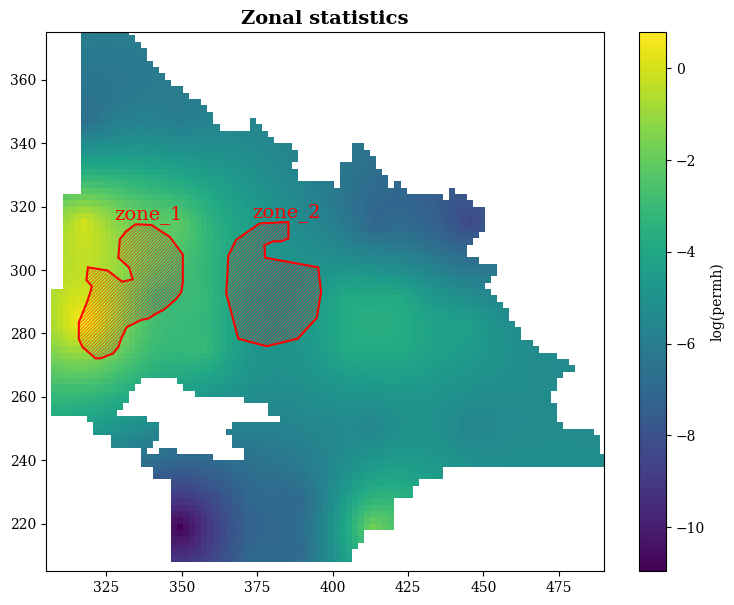

In [327]:
# -- Set hatch parameters
mpl.rc('hatch', color='k', linewidth=.3)

# -- Plot basic field
fig, ax = plt.subplots(figsize=(9, 7))
ax = mf.plot(ax=ax, layer=6, log=True, extent=(305, 205, 490, 375))

# -- Build matplotlib Polygon patches
shp_df['patches'] = shp_df['coords'].apply(Polygon)

# -- Localize zones
for zname in shp_df['zname']:
    # -- Get polygon patch
    patch = shp_df.loc[shp_df.zname == zname, 'patches'].values[0]
    patch.set(**{'fc': 'none', 'ec': 'red', 'lw':1.5, 'hatch': '/'*10})
    # -- Add pacthes to plot
    ax.add_patch(patch)
    # -- Add zone id
    ax.text(*patch.xy.max(axis=0), s=zname, ha='right', va='bottom',
            fontsize=14, color='red')

# -- Add title
ax.set_title('Zonal statistics', fontsize=14, fontweight='bold')

In [345]:
# -- Set required statistics
stats = ['mean', 'max', 'min', 'median', 'count']

# -- Perform zonal statistics method
zstats_df = mf.zonal_stats(stats=stats,
                           polygons=shp_df['coords'],
                           names=shp_df['zname'],
                           trans='log10')

# -- Show results
(
    zstats_df
    .style
    .format(precision=2)
    .set_caption('<h1 align=center><b>ZONAL STATISTICS</b></h1><br>')
    .background_gradient(cmap='coolwarm', subset=['mean', 'median'])
    .background_gradient(cmap='Reds', subset=['max'])
    .background_gradient(cmap='Blues', subset=['min'])
    .background_gradient(cmap='Greys', subset=['count'])
    .set_table_styles(table_style)
)

C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: invalid value encountered in divide
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: divide by zero encountered in divide
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: invalid value encountered in divide
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: divide by zero encountered in divide


<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> the <code>.zonal_stats()</code> method <b>does not perform any intersections</b>, the cell selection is entirely based on powerful <i>ray casting</i> algorithm to test if <b>cell edges</b> are in a given polygon.
</div>

## 👉 Vectorial exports

The `MartheField` instance supports vectorial exports (_shapefile_) through the `.to_shapefile()` method.
It's will save **non masked cell** of required layers (and nested grids) with all basic informations (_layer_, _inest_, _i_, _j_, ..).

In [421]:
# -- Set shapefile name
shpname = os.path.join('monav3', 'export', 'permh.shp')

# -- Export all permeability values
mf.to_shapefile(shpname)

No CRS information for writing a .prj file.
Supply an epsg code or .prj file path to the model spatial reference or .export() method.(writing .prj files from proj4 strings not supported)

 ---> Shapefile wrote in monav3\export\permh.shp succesfully.


In [423]:
# -- Read created shapfile
permh_df = shp_utils.read_shapefile(shpname)

# -- Print results
permh_df.sample(3)

layer  inest    i   j      x      y      val   
758       0      0   75  40  365.5  261.0  0.00021  \
1964      0      0  102  44  373.5  207.0  0.00021   
2641      0      0  117  31  347.5  177.0  0.00021   

                                                                                coords  
758   [(364.5, 260.0), (364.5, 262.0), (366.5, 262.0), (366.5, 260.0), (364.5, 260.0)]  
1964  [(372.5, 206.0), (372.5, 208.0), (374.5, 208.0), (374.5, 206.0), (372.5, 206.0)]  
2641  [(346.5, 176.0), (346.5, 178.0), (348.5, 178.0), (348.5, 176.0), (346.5, 176.0)]

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> set <code>masked_values=[]</code> to export <b>all cells</b> (<i>including inactive ones</i>).
    </span>
</div>

In [426]:
# -- Custom export of permeability values
mf.to_shapefile(shpname, layer=6, inest=0, log=True)

# -- Read created shapfile
permh_df = shp_utils.read_shapefile(shpname)

# -- Print results
permh_df.sample(3)

No CRS information for writing a .prj file.
Supply an epsg code or .prj file path to the model spatial reference or .export() method.(writing .prj files from proj4 strings not supported)

 ---> Shapefile wrote in monav3\export\permh.shp succesfully.


layer  inest   i   j      x      y  log(val)   
3932      6      0  90  57  399.5  231.0 -3.677781  \
257       6      0  34  18  321.5  343.0 -3.677781   
1696      6      0  58  72  429.5  295.0 -3.677781   

                                                                                coords  
3932  [(398.5, 230.0), (398.5, 232.0), (400.5, 232.0), (400.5, 230.0), (398.5, 230.0)]  
257   [(320.5, 342.0), (320.5, 344.0), (322.5, 344.0), (322.5, 342.0), (320.5, 342.0)]  
1696  [(428.5, 294.0), (428.5, 296.0), (430.5, 296.0), (430.5, 294.0), (428.5, 294.0)]

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> the exported shapefile will write cell shapes with <b>basic geometric coordinates</b>. Feel free to provide the <code>epsg</code> or <code>prj</code> arguments to export field cells with <b>projected coordinates</b> (<i>ex: <code>epsg=2154</code></i>).
    </span>
</div>

## 👉 Write field data

`MartheField` instance can write all field values as **Marthe** grid file format.

In [353]:
# -- Load emmca field
mm.load_prop('emmca')
mf = mm.prop['emmca']

# -- Modify some values
mf.set_data(2.1e-4, layer=[0, 1, 6, 12])

# -- Write values as new .emmca Marthe grid file
mf.write_data(os.path.join(mm.mldir, 'mona_modified.emmca'))

In [372]:
# -- Print first lines of new grid files
!head -n 26  monav3/mona_modified.emmca

Marthe_Grid Version=9.0
Title=Travail                                                                emmca            1
[Infos]
Field=emmca
Type=
Elem_Number=0
Name=
Time_Step=-9999
Time=0
Layer=1
Max_Layer=15
Nest_grid=0
Max_NestG=0
[Structure]
X_Left_Corner=284.5
Y_Lower_Corner=156.0
Ncolumn=148
Nrows=128
[Data_Descript]
! Line 1       :   0   ,     0          , <   1 , 2 , 3 , Ncolumn   >
! Line 2       :   0   ,     0          , < X_Center_of_all_Columns >
! Line 2+1     :   1   , Y_of_Row_1     , < Field_Values_of_all_Columns > , Dy_of_Row_1
! Line 2+2     :   2   , Y_of_Row_2     , < Field_Values_of_all_Columns > , Dy_of_Row_2
! Line 2+Nrows : Nrows , Y_of_Row_Nrows , < Field_Values_of_all_Columns > , Dy_of_Row_2
! Line 3+Nrows :   0   ,     0          , <     Dx_of_all_Columns   >
[Data]


# 🎇 **`MartheSoil` instance** 🎇

`PyMarthe` library can easily manipulate the **zonal soil properties** contains in the model such as:<br>
&emsp;&emsp;➼&emsp;_cap_sol_progr_<br>
&emsp;&emsp;➼&emsp;_equ_ruis_perc_<br>
&emsp;&emsp;➼&emsp;_t_demi_percol_<br>
&emsp;&emsp;➼&emsp;_def_sol_progr_<br>
&emsp;&emsp;➼&emsp;_rumax_<br>
&emsp;&emsp;➼&emsp;_defic_sol_<br>

There are parameters from the related [**Gardenia**](https://www.brgm.fr/fr/logiciel/gardenia-logiciel-modelisation-hydrologique-globale-bassin-versant) software also developped by the **BRGM**. These parameters are generally implemented in the _.mart_ file in the _'Initisialisation des calculs'_ section. As _list-like_ parameters, the **soil properties** will be stored in a classic `DataFrame` object. But, since their values are related to a **hydroclimatic zone**, they have a **spatial application** (_cell-by-cell_) that's the reason why some `MartheSoil` functionalities correspond to _wrappers_ to `MartheField` class.

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> if the main model does not contain any zonal soil properties an <b>assertion error will be raised</b>.
    </span>
</div>

The actual **MONAv.3** model does not contain any soil properties. Therefore, we will load the **Lizonne** model instead.

In [374]:
# -- Load lizonne model
liz = MartheModel(lizonne_ws, spatial_index=True)


Building spatial index ...
[================================================  ] 96%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100%

## 👉 Basic loading & attributes

In **Marthe** there are 3 ways of implementing the **Gardenia** soil property parameters in the model.<br>

&emsp;&emsp;➼&emsp;`mart-c`  : constant soil properties in _.mart_ file<br>
&emsp;&emsp;➼&emsp;`pastp-c` : constant soil property in _.pastp_ file<br>
&emsp;&emsp;➼&emsp;`pastp-t` : transient soil property in _.pastp_ file<br>

In [444]:
!tail -n 22 lizonnev2/lizonne.mart

 *** Initialisation avant calcul                     ***
  /CAP_SOL_PROGR/ZONE_SOL  Z=      1V=       141;
  /EQU_RUIS_PERC/ZONE_SOL  Z=      1V=        40;
  /T_DEMI_PERCOL/ZONE_SOL  Z=      1V=        15;
  /!!!!!/!!!!!
  /CAP_SOL_PROGR/ZONE_SOL  Z=      2V=       163;
  /EQU_RUIS_PERC/ZONE_SOL  Z=      2V=        86;
  /T_DEMI_PERCOL/ZONE_SOL  Z=      2V=        70;
  /!!!!!/!!!!!
  /CAP_SOL_PROGR/ZONE_SOL  Z=      8V=       222;
  /EQU_RUIS_PERC/ZONE_SOL  Z=      8V=         5;
  /T_DEMI_PERCOL/ZONE_SOL  Z=      8V=       161;
  /!!!!!/!!!!!
  /CAP_SOL_PROGR/ZONE_SOL  Z=     10V=       295;
  /EQU_RUIS_PERC/ZONE_SOL  Z=     10V=        48;
  /T_DEMI_PERCOL/ZONE_SOL  Z=     10V=        42;
  /!!!!!/!!!!!
  /CAP_SOL_PROGR/ZONE_SOL  Z=     11V=       340;
  /EQU_RUIS_PERC/ZONE_SOL  Z=     11V=       158;
  /T_DEMI_PERCOL/ZONE_SOL  Z=     11V=        27;
  /*****/***** Fin d'Initialisation
 *** Fin du fichier des Paramètres Généraux          ***


<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> there is <b>no need</b> to specify the type of soil properties implementation, the <code>MartheSoil</code> constructor will infer it automatically.
    </span>
</div>

In [394]:
# -- Load MartheSoil instance (internally)
liz.load_prop('soil')
ms = liz.prop['soil']

# -- Load MartheSoil instance (externally)
ms = MartheSoil(liz, martfile=liz.mlfiles['mart'], pastpfile=liz.mlfiles['pastp'])

# -- Print basic MartheSoil informations
print('\t', ms, '\n', '-'*30)
print('Model property name:', ms.prop_name)
print('Implementation type:', ms.mode)
print('Number of zone:', ms.nzone)
print('Number of soil properties:', ms.nsoilprop)
print('Available zones:', ms.zones)
print('Available soil properties:', ms.soilprops)

	 MartheSoil 
 ------------------------------
Model property name: soil
Implementation type: mart-c
Number of zone: 5
Number of soil properties: 3
Available zones: [ 1  2  8 10 11]
Available soil properties: ['cap_sol_progr' 'equ_ruis_perc' 't_demi_percol']


## 👉 `Getters` & `Setters`

The main data correspond to a simple table (`DataFrame`) with the correspondance between the existing soil properties in _.mart_ file, the **spatial zone ids** representing by a `MartheField` object (`.zonep`).<br>

As all `PyMarthe` properties, the soil data can be reached using the `.get_data()` method.
The user can subet the soil data giving required:<br>

&emsp;&emsp;➼&emsp;**soil property name** (`soilprop`)<br>
&emsp;&emsp;➼&emsp;**soil zone** (`zone`)<br>
&emsp;&emsp;➼&emsp;**time step index** (`istep`)<br>

The output is be a simple subset (`DataFrame`) of soil data. For more advanced queries, feel free to slicing over the `.data` attribut.

In [643]:
# -- Get all soil data
ms.get_data()

istep       soilprop  zone  value
0       0  cap_sol_progr     1  141.0
1       0  cap_sol_progr     2  163.0
2       0  cap_sol_progr     8  222.0
3       0  cap_sol_progr    10  295.0
4       0  cap_sol_progr    11  340.0
5       0  equ_ruis_perc     1   40.0
6       0  equ_ruis_perc     2   86.0
7       0  equ_ruis_perc     8    5.0
8       0  equ_ruis_perc    10   48.0
9       0  equ_ruis_perc    11  158.0
10      0  t_demi_percol     1   15.0
11      0  t_demi_percol     2   70.0
12      0  t_demi_percol     8  161.0
13      0  t_demi_percol    10   42.0
14      0  t_demi_percol    11   27.0

In [398]:
# -- Get the 'cap_sol_progr' (gradual soil capacity) property of zones 1 and 8
ms.get_data(soilprop='cap_sol_progr', zone=[1, 8])

istep       soilprop  zone  value
0      0  cap_sol_progr     1  141.0
2      0  cap_sol_progr     8  222.0

As we already explained above, the `MartheSoil` instance has a **strong spatial (distributed) application**. Setting `as_style='array-like` allows the user to fetch the complete _cell-by-cell_ soil data as `rec.array`. In fact, it will subset the `.zonep` field and replacing the **zone ids** by their soil values.

In [400]:
ms.get_data(soilprop='cap_sol_progr', zone=2, as_style='array-like')

rec.array([(0, 0,  0,  0, 480910., 6504820., 163.),
           (0, 0,  0,  1, 481410., 6504820., 163.),
           (0, 0,  0,  2, 481910., 6504820., 163.), ...,
           (0, 0, 73, 67, 514410., 6468320., 163.),
           (0, 0, 73, 68, 514910., 6468320., 163.),
           (0, 0, 73, 69, 515410., 6468320., 163.)],
          dtype=[('layer', '<i8'), ('inest', '<i8'), ('i', '<i8'), ('j', '<i8'), ('x', '<f8'), ('y', '<f8'), ('value', '<f8')])

<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> getting data with <code>as_style='array-like'</code> <b>does not support</b> multiple soil properties
</div>

When setting `as_style='array-like'`, the `getter` also accepts some `MartheField` variables as `**kwargs`, especially `inest` to work with nested grid.
<p style="color: red">It should also be noted that soil properties are <b>only defined on the corresponding <i>"first layer"</i>.</b></p>

For example, setting `layer=3` will return an empty `rec.array`.

In [405]:
# -- Using the additional `MartheField` variables
ms.get_data(soilprop='cap_sol_progr', as_style='array-like', inest=0)

rec.array([(0, 0,  0,  0, 480910., 6504820., 163.),
           (0, 0,  0,  1, 481410., 6504820., 163.),
           (0, 0,  0,  2, 481910., 6504820., 163.), ...,
           (0, 0, 73, 74, 517910., 6468320., 222.),
           (0, 0, 73, 75, 518410., 6468320., 222.),
           (0, 0, 73, 76, 518910., 6468320., 222.)],
          dtype=[('layer', '<i8'), ('inest', '<i8'), ('i', '<i8'), ('j', '<i8'), ('x', '<f8'), ('y', '<f8'), ('value', '<f8')])

In [406]:
# -- Trying to get soil data on another layer
ms.get_data(soilprop='cap_sol_progr', zone=2, as_style='array-like', layer=3)

rec.array([],
          dtype=[('layer', '<i8'), ('inest', '<i8'), ('i', '<i8'), ('j', '<i8'), ('x', '<f8'), ('y', '<f8'), ('value', '<f8')])

The soil properties are **generally constant**  over the **time window** defined in the model, but it may happen that, for larger models with a **wide time window**, the soil properties vary.
Even if it's **not explicitly written** in the _.mart_ or _.pastp_ file and store in `ms.data`, the user can access the soil data value for **specific model time steps** by setting the `force=True`.

This works by searching and filling missing isteps from the **nearest previous istep** (`npi`) where soil data were defined. Note that it can be quite slow if several time steps are required.

Let's extract the property `cap_sol_progr` for the istep $0$ to $10$ (must be the same as the first time step because lizonne soil properties are all constants in time window). 

In [410]:
# --- Without forcing time steps 
ms.get_data(soilprop='cap_sol_progr', zone=11, istep=np.arange(10), force=False)

istep       soilprop  zone  value
4      0  cap_sol_progr    11  340.0

In [412]:
# --- By forcing time steps 
ms.get_data(soilprop='cap_sol_progr', zone=11, istep=np.arange(10), force=True)

istep       soilprop  zone  value
0      0  cap_sol_progr    11  340.0
1      1  cap_sol_progr    11  340.0
2      2  cap_sol_progr    11  340.0
3      3  cap_sol_progr    11  340.0
4      4  cap_sol_progr    11  340.0
5      5  cap_sol_progr    11  340.0
6      6  cap_sol_progr    11  340.0
7      7  cap_sol_progr    11  340.0
8      8  cap_sol_progr    11  340.0
9      9  cap_sol_progr    11  340.0

Setting values works exactly the same as basic `getter` except that the user has to define a **specific values**. Consider using the `.set_data()` method.

In [451]:
# -- Set value for all zone/istep
ms.set_data('cap_sol_progr', value=125)

# -- Print results
ms.get_data('cap_sol_progr')

istep       soilprop  zone  value
0      0  cap_sol_progr     1  125.0
1      0  cap_sol_progr     2  125.0
2      0  cap_sol_progr     8  125.0
3      0  cap_sol_progr    10  125.0
4      0  cap_sol_progr    11  125.0

In [452]:
# ---- Set value fo specific zones / istep
ms.set_data('cap_sol_progr', value=112, zone=[1, 2], istep=0)

# -- Print results
ms.get_data('cap_sol_progr', zone=[1, 2], istep=0)

istep       soilprop  zone  value
0      0  cap_sol_progr     1  112.0
1      0  cap_sol_progr     2  112.0

For multiple, conditionnal _and/or_ complex settings, feel free to use basic `pandas` facilities on `.data` attributs.

In [461]:
# -- Setting data using pandas (basic filtering)
ms.data.loc[(ms.data.soilprop == 'cap_sol_progr') & (ms.data.zone > 2), 'value'] = 134

# -- Print results
ms.data

istep       soilprop  zone  value
0       0  cap_sol_progr     1  141.0
1       0  cap_sol_progr     2  163.0
2       0  cap_sol_progr     8  134.0
3       0  cap_sol_progr    10  134.0
4       0  cap_sol_progr    11  134.0
5       0  equ_ruis_perc     1   53.0
6       0  equ_ruis_perc     2   86.0
7       0  equ_ruis_perc     8   17.0
8       0  equ_ruis_perc    10   48.0
9       0  equ_ruis_perc    11  158.0
10      0  t_demi_percol     1   15.0
11      0  t_demi_percol     2   70.0
12      0  t_demi_percol     8  161.0
13      0  t_demi_percol    10   42.0
14      0  t_demi_percol    11   27.0

In [476]:
# -- Setting data using pandas (row iteration)
ms.data['value'] = ms.data.apply(lambda x: 10
                                      if (x.value < ms.data.loc[ms.data.soilprop == 'equ_ruis_perc', 'value'].mean()) & \
                                         (x.soilprop == 't_demi_percol')
                                      else x.value,
                                 axis=1)

# -- Print results
ms.data

istep       soilprop  zone  value
0       0  cap_sol_progr     1  141.0
1       0  cap_sol_progr     2  163.0
2       0  cap_sol_progr     8  222.0
3       0  cap_sol_progr    10  295.0
4       0  cap_sol_progr    11  340.0
5       0  equ_ruis_perc     1   53.0
6       0  equ_ruis_perc     2   86.0
7       0  equ_ruis_perc     8   17.0
8       0  equ_ruis_perc    10   48.0
9       0  equ_ruis_perc    11  158.0
10      0  t_demi_percol     1   10.0
11      0  t_demi_percol     2   10.0
12      0  t_demi_percol     8  161.0
13      0  t_demi_percol    10   10.0
14      0  t_demi_percol    11   10.0

In [477]:
# -- Reload initial data
liz.load_prop('soil')
ms = liz.prop['soil']

## 👉 Additional `wrappers`

As mentioned above, the `MartheSoil` class has a `.zonep` field attribute. So, `wrappers` have been implemented to access to access some `MartheField` methods.

### ☛ Plotting

In [ ]:
# -- Prepare figure
plt.rc('font', family='serif', size=9)
fig, ax = plt.subplots(figsize=(8, 6))

# -- Plot progressive soil capacity values
ms.plot(soilprop='cap_sol_progr', ax=ax, cmap='Paired')

### ☛ Sampling

In [ ]:
# -- Generate random points
ext = liz.get_extent() # model extent
x, y = [np.random.uniform(*p, 50) for p in [ext[::2], ext[1::2]]]

# -- Sampling (from points shapefile)
ms.sample(soilprop='cap_sol_progr', x=x, y=y)

### ☛ Exporting

In [ ]:
# -- Setting output path
os.makedirs(os.path.join(liz.mldir, 'export'), exist_ok=True)
filename = os.path.join(liz.mldir, 'export', 'cap_sol_progr.shp')

# -- Write spatial soil properties
ms.to_shapefile('cap_sol_progr', filename=filename, epsg=2154)

## 👉 Write soil data

As all properties in `PyMarthe`, the `MartheSoil` instance has the ability to write the soil data in classic **Marthe** format.

In [475]:
# -- Load soil data
liz.load_prop('soil')
ms = liz.prop['soil']

# -- Change equ_ruis_perc values 
ms.set_data('equ_ruis_perc', value=17, zone=8)
ms.set_data('equ_ruis_perc', value=53, zone=1)

# -- Write soil data
ms.write_data(os.path.join(liz.mldir, 'Lizonne_modified.mart'))

In [448]:
!tail -n 22 lizonnev2/Lizonne_modified.mart

 *** Initialisation avant calcul                     ***
  /CAP_SOL_PROGR/ZONE_SOL  Z=      1V=       141;
  /EQU_RUIS_PERC/ZONE_SOL  Z=      1V=        53;
  /T_DEMI_PERCOL/ZONE_SOL  Z=      1V=        15;
  /!!!!!/!!!!!
  /CAP_SOL_PROGR/ZONE_SOL  Z=      2V=       163;
  /EQU_RUIS_PERC/ZONE_SOL  Z=      2V=        86;
  /T_DEMI_PERCOL/ZONE_SOL  Z=      2V=        70;
  /!!!!!/!!!!!
  /CAP_SOL_PROGR/ZONE_SOL  Z=      8V=       222;
  /EQU_RUIS_PERC/ZONE_SOL  Z=      8V=        17;
  /T_DEMI_PERCOL/ZONE_SOL  Z=      8V=       161;
  /!!!!!/!!!!!
  /CAP_SOL_PROGR/ZONE_SOL  Z=     10V=       295;
  /EQU_RUIS_PERC/ZONE_SOL  Z=     10V=        48;
  /T_DEMI_PERCOL/ZONE_SOL  Z=     10V=        42;
  /!!!!!/!!!!!
  /CAP_SOL_PROGR/ZONE_SOL  Z=     11V=       340;
  /EQU_RUIS_PERC/ZONE_SOL  Z=     11V=       158;
  /T_DEMI_PERCOL/ZONE_SOL  Z=     11V=        27;
  /*****/***** Fin d'Initialisation
 *** Fin du fichier des Paramètres Généraux          ***


# 🎇 **`MarthePump` instance** 🎇

`PyMarthe` also has the ability to deal with **withdraw data** from either aquifer pumping (`aqpump`) or river pumping (`rivpump`). In **Marthe** withdraw data are stored in the _.pastp_ file as additional lines with the following pattern:<br>

<p style="text-align: center; font-size: 18px; color: #8B4513; background-color: #FAF0E6; padding: 15px">
<i>pumping_source</i> ⏩ <i>implementation_type</i> ⏩ <i>cell_identifier</i> ⏩ <i>withdraw_value</i> ⏩<i>external_file</i> ⏩ <i>external_file_args</i>
</p><br>

`PyMarthe` accepts 2 types of **pumping implementations**:<br>

&emsp;&emsp;➼&emsp;**Multiple cells value** (`LISTM`, `LIST_M`): list of several cells for a given time step with related pumping values _(commonly used for regional models)_<br>
&emsp;&emsp;➼&emsp;**Single cell value** (`MAILLE`, `MAIL`): unique cell with single pumping value _(commonly used for small models)_<br>
&emsp;&emsp;➼&emsp;**Single cell record** (`MAILLE`, `MAIL`): unique cell with several pumping values _(commonly used for models with a large number of time steps)_<br>

Let's see some pumping implementation examples.

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> a single model can of course combine <b>several types</b> of pumping data implementation.
    </span>
</div>

<p style="color:#FA8072; font-size:1.2em;">📸 <i> <code>LISTM</code> pumping implementation</i></p>

In [580]:
# -- Example of aquifer pumping in MONA model 
!grep '/DEBIT/' monav3/mona.pastp -m 5

  /DEBIT/LISTM       N: ./mona.deb/mona1972.txt     
  /DEBIT/LISTM        N: ./mona.deb/mona1973.txt     
  /DEBIT/LISTM        N: ./mona.deb/mona1974.txt     
  /DEBIT/LISTM        N: ./mona.deb/mona1975.txt     
  /DEBIT/LISTM        N: ./mona.deb/mona1976.txt     


In [613]:
# -- Print the related external file (format: value | column | row | layer)
!tail monav3/mona.deb/mona1980.txt -n 10

0.00	118	53	15
0.00	118	58	9
0.00	118	58	10
0.00	118	59	14
0.00	119	53	15
0.00	119	57	14
0.00	120	58	14
0.00	121	59	14
0.00	121	62	14
0.00	121	63	14


In [599]:
# -- Example of aquifer pumping in lizonne model 
!grep '/DEBIT/' lizonnev2/lizonne.pastp -m 5

  /DEBIT/LIST_MAIL         N: prelevements_souterrains/prelevements_2003_01_01.txt <X_Y_C> <Somm_Mail> <Keep_9999>
  /DEBIT/LIST_MAIL         N: prelevements_souterrains/prelevements_2004_01_01.txt <X_Y_C> <Somm_Mail> <Keep_9999>
  /DEBIT/LIST_MAIL         N: prelevements_souterrains/prelevements_2005_01_01.txt <X_Y_C> <Somm_Mail> <Keep_9999>
  /DEBIT/LIST_MAIL         N: prelevements_souterrains/prelevements_2006_01_01.txt <X_Y_C> <Somm_Mail> <Keep_9999>
  /DEBIT/LIST_MAIL         N: prelevements_souterrains/prelevements_2007_01_01.txt <X_Y_C> <Somm_Mail> <Keep_9999>


In [608]:
# -- Print the related external file (format: x | y | layer | value)
!tail lizonnev2/prelevements_souterrains/prelevements_2003_01_01.txt -n 10

489544.9969	6471319.0	4	0.0
495014.9991	6476221.998	6	-0.000644900911382
492845.2393	6491449.208	4	-0.002272641366
492828.699	6489451.122	4	-0.0016370818446
490608.996	6472357.003	2	-0.000181380056
501130.7966	6480453.495	2	-0.00475647
497120.9678	6483040.997	6	0.0
500152.9608	6481540.466	2	0.0
498651.8423	6488417.998	4	0.0
494507.8971	6475669.501	6	-0.0017015795778


<p style="color:#FA8072; font-size:1.2em;">📸 <i> <code>MAILLE</code> pumping implementation (single value)</i></p>

In [585]:
# -- Example of aquifer pumping in hallue model
!grep '/DEBIT/' hallue/hallue.pastp -m 1

  /DEBIT/MAILLE            C=     23L=     22P=      1V=       0.0;


<p style="color:#FA8072; font-size:1.2em;">📸 <i> <code>MAILLE</code> pumping implementation (record)</i></p>

In [595]:
# -- Example of aquifer pumping in hallue model
!grep 'prelevements_souterrains' hallue/hallue.pastp

  /DEBIT/MAILLE            C=     18L=     33P=      1V=       0.0; File= prelevements_souterrains.txt;
  /DEBIT/MAILLE            C=     20L=     42P=      1V=       0.0; File= prelevements_souterrains.txt; Col=2


In [614]:
# -- Print the related external file (format: value)
!tail hallue/prelevements_souterrains.txt -n 10

-2202.044918	-3558.6842623
-2202.044918	-3558.6842623
-2202.044918	-3558.6842623
-2202.044918	-3558.6842623
-2202.044918	-3558.6842623
-2202.044918	-3558.6842623
-2202.044918	-3558.6842623
-2202.044918	-3558.6842623
-2202.044918	-3558.6842623
-2202.044918	-3558.6842623


## 👉 Basic loading & attributes

`Marthepump` constructor can be used to read **aquifer pumping** by setting `mode='aquifer'` _(by default)_ or to read **river pumping** by setting `mode='river'`.

In [620]:
# -- Build MarthePump instance externaly
mp = MarthePump(mm, mode='aquifer', verbose=False)

# -- Fetch pumping property from main model
mm.load_prop('aqpump')
mp = mm.prop['aqpump']

C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\mpump.py:88: UserWarning: Pumping condition applied on inactive cell : Node = 26813, Layer = 1, Nested = 0, Row = 53, Column = 25 .
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\mpump.py:88: UserWarning: Pumping condition applied on inactive cell : Node = 105550, Layer = 5, Nested = 0, Row = 73, Column = 26 .
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\mpump.py:88: UserWarning: Pumping condition applied on inactive cell : Node = 4911, Layer = 0, Nested = 0, Row = 33, Column = 27 .
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\mpump.py:88: UserWarning: Pumping condition applied on inactive cell : Node = 105551, Layer = 5, Nested = 0, Row = 73, Column = 27 .
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\mpump.py:88: UserWarning: Pumping condition applied on inactive cell : Node = 27114, Layer = 1, Nested = 0, Row = 55, Column = 30 .
C:\U

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> by default, the <code>MarthePump</code> constructor will perform some checks on pumping data especially if a withdraw condition is applied on <b>an inactive cell</b>. Set <code>verbose=False</code> to overpass all warnings.
    </span>
</div>

Pumping data are stored in a simple `DataFrame` object in the `.data` attribut with informations on _istep_, _node_, layer_, _i_, _j_, _value_ and _boundname_. There is also a private argument (`._data`) with additional **Marthe** _metadata_ (mainly for external file handling).

In [639]:
# -- Print main informations about MarthePump instance
print('\t', mp, '\n', '-'*30)
print('Pumping source:', mp.mode)
print('Model property name:', mp.prop_name)
print('Accepted pumping implementation:', mp.qtypes)
print('Available informations:', mp.vars)
print('Available metadata informations:', mp._vars)

	 MarthePump 
 ------------------------------
Pumping source: aquifer
Model property name: aqpump
Accepted pumping implementation: ['mail', 'record', 'listm']
Available informations: ['istep', 'node', 'layer', 'i', 'j', 'value', 'boundname']
Available metadata informations: ['istep', 'node', 'layer', 'i', 'j', 'value', 'boundname', 'qfilename', 'qtype', 'qrow', 'qcol']


## 👉 `Getters` & `Setters`

As all `PyMarthe` properties, the soil data can be reached using the `.get_data()` method.
The user can subet the soil data giving required:<br>

&emsp;&emsp;➼&emsp;**time step index** (`istep`)<br>
&emsp;&emsp;➼&emsp;**cell id** (`node`)<br>
&emsp;&emsp;➼&emsp;**layer id** (`layer`)<br>
&emsp;&emsp;➼&emsp;**row number** (`i`)<br>
&emsp;&emsp;➼&emsp;**column number** (`j`)<br>
&emsp;&emsp;➼&emsp;**withdraw point name** (`boundname`)<br>

The output is be a simple subset (`DataFrame`) of pumping data. For more advanced queries, feel free to slicing over the `.data` attribut.

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> each withdraw point can be identify by a custom name. If there is no specified in the <b>Marthe</b>, a generic <code>boundname</code> will be created with format <code>[aq|riv]pump_[node])</code>.
    </span>
</div>

In [644]:
# -- Get all pumping data
mp.get_data()

istep    node  layer    i    j   value      boundname
0          0   35533      1  112   13    0.00  aqpump_035533
1          0   31686      1   86   14    0.00  aqpump_031686
2          0   34350      1  104   14    0.00  aqpump_034350
3          0   34646      1  106   14    0.00  aqpump_034646
4          0   55810      2  121   14    0.00  aqpump_055810
...      ...     ...    ...  ...  ...     ...            ...
98795     39  254678     13   56  118  -39.27  aqpump_254678
98796     39  254827     13   57  119 -309.19  aqpump_254827
98797     39  254976     13   58  120  -37.52  aqpump_254976
98798     39  255420     13   61  120    0.00  aqpump_255420
98799     39  255568     13   62  120 -530.30  aqpump_255568

[98800 rows x 7 columns]

<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> remember that pumping water is considering as a <b>aquifer loss</b>, that's the reason why pumping values must be <b>&ge; 0</b>.
</div>

In [645]:
# -- Get data on a single specific time step
mp.get_data(istep=2)

istep    node  layer    i    j  value      boundname
4940      2   35533      1  112   13    0.0  aqpump_035533
4941      2   31686      1   86   14    0.0  aqpump_031686
4942      2   34350      1  104   14    0.0  aqpump_034350
4943      2   34646      1  106   14    0.0  aqpump_034646
4944      2   55810      2  121   14    0.0  aqpump_055810
...     ...     ...    ...  ...  ...    ...            ...
7405      2  254678     13   56  118    0.0  aqpump_254678
7406      2  254827     13   57  119    0.0  aqpump_254827
7407      2  254976     13   58  120    0.0  aqpump_254976
7408      2  255420     13   61  120    0.0  aqpump_255420
7409      2  255568     13   62  120    0.0  aqpump_255568

[2470 rows x 7 columns]

In [646]:
# -- Get data on several time steps
mp.get_data(istep=np.arange(0, mm.nstep, 4)) # every 4 time steps

istep    node  layer    i    j   value      boundname
0          0   35533      1  112   13    0.00  aqpump_035533
1          0   31686      1   86   14    0.00  aqpump_031686
2          0   34350      1  104   14    0.00  aqpump_034350
3          0   34646      1  106   14    0.00  aqpump_034646
4          0   55810      2  121   14    0.00  aqpump_055810
...      ...     ...    ...  ...  ...     ...            ...
91385     36  254678     13   56  118  -39.27  aqpump_254678
91386     36  254827     13   57  119 -309.19  aqpump_254827
91387     36  254976     13   58  120  -37.52  aqpump_254976
91388     36  255420     13   61  120    0.00  aqpump_255420
91389     36  255568     13   62  120 -603.97  aqpump_255568

[24700 rows x 7 columns]

In [647]:
# -- Get data on a target layer
mp.get_data(istep=3, layer=[5, 8])

istep    node  layer   i    j   value      boundname
7434      3  104653      5  67   17  -10.53  aqpump_104653
7436      3  104801      5  68   17    0.00  aqpump_104801
7439      3  105393      5  72   17 -116.30  aqpump_105393
7450      3  104506      5  66   18    0.00  aqpump_104506
7454      3  105394      5  72   18 -797.82  aqpump_105394
...     ...     ...    ...  ..  ...     ...            ...
9857      3  160991      8  63  115    0.00  aqpump_160991
9859      3  161139      8  64  115    0.00  aqpump_161139
9864      3  160104      8  57  116    0.00  aqpump_160104
9866      3  160696      8  61  116    0.00  aqpump_160696
9871      3  160105      8  57  117    0.00  aqpump_160105

[544 rows x 7 columns]

In [651]:
# -- Get data on single point (based on row/colum)
mp.get_data(i=102, j=53)

istep   node  layer    i   j   value      boundname
1587       0  53037      2  102  53    0.00  aqpump_053037
4057       1  53037      2  102  53    0.00  aqpump_053037
6527       2  53037      2  102  53    0.00  aqpump_053037
8997       3  53037      2  102  53    0.00  aqpump_053037
11467      4  53037      2  102  53    0.00  aqpump_053037
13937      5  53037      2  102  53    0.00  aqpump_053037
16407      6  53037      2  102  53    0.00  aqpump_053037
18877      7  53037      2  102  53    0.00  aqpump_053037
21347      8  53037      2  102  53    0.00  aqpump_053037
23817      9  53037      2  102  53    0.00  aqpump_053037
26287     10  53037      2  102  53    0.00  aqpump_053037
28757     11  53037      2  102  53 -342.23  aqpump_053037
31227     12  53037      2  102  53 -342.23  aqpump_053037
33697     13  53037      2  102  53 -752.90  aqpump_053037
36167     14  53037      2  102  53 -752.90  aqpump_053037
38637     15  53037      2  102  53 -752.90  aqpump_053037
41107     16  53037      2  102  53 -752.90  aqpump_053037
43577     17  53037      2  102  53 -752.90  aqpump_053037
46047     18  53037      2  102  53 -752.90  aqpump_053037
48517     19  53037      2  102  53 -752.90  aqpump_053037
50987     20  53037      2  102  53 -752.90  aqpump_053037
53457     21  53037      2  102  53 -752.90  aqpump_053037
55927     22  53037      2  102  53 -752.90  aqpump_053037
58397     23  53037      2  102  53 -752.90  aqpump_053037
60867     24  53037      2  102  53 -752.90  aqpump_053037
63337     25  53037      2  102  53 -752.90  aqpump_053037
65807     26  53037      2  102  53 -752.90  aqpump_053037
68277     27  53037      2  102  53 -752.90  aqpump_053037
70747     28  53037      2  102  53 -752.90  aqpump_053037
73217     29  53037      2  102  53 -752.90  aqpump_053037
75687     30  53037      2  102  53 -752.90  aqpump_053037
78157     31  53037      2  102  53 -752.90  aqpump_053037
80627     32  53037      2  102  53 -752.90  aqpump_053037
83097     33  53037      2  102  53 -752.90  aqpump_053037
85567     34  53037      2  102  53 -752.90  aqpump_053037
88037     35  53037      2  102  53 -752.90  aqpump_053037
90507     36  53037      2  102  53 -752.90  aqpump_053037
92977     37  53037      2  102  53 -752.90  aqpump_053037
95447     38  53037      2  102  53 -752.90  aqpump_053037
97917     39  53037      2  102  53 -752.90  aqpump_053037

In [659]:
# -- Get data on single point (based on node id)
mp.get_data(node=[31686, 66765])

istep   node  layer   i   j   value      boundname
1          0  31686      1  86  14    0.00  aqpump_031686
22         0  66765      3  67  17    0.00  aqpump_066765
2471       1  31686      1  86  14    0.00  aqpump_031686
2492       1  66765      3  67  17    0.00  aqpump_066765
4941       2  31686      1  86  14    0.00  aqpump_031686
...      ...    ...    ...  ..  ..     ...            ...
91412     37  66765      3  67  17 -325.68  aqpump_066765
93861     38  31686      1  86  14  -21.90  aqpump_031686
93882     38  66765      3  67  17 -395.61  aqpump_066765
96331     39  31686      1  86  14  -21.90  aqpump_031686
96352     39  66765      3  67  17 -375.85  aqpump_066765

[80 rows x 7 columns]

In **MONA** model, well names are not explicitly given in _.pastp_ so all pumping points have a **generic name**. The `.switch_boundnames()` method can be used to replace the generic name by it's real one. Let's give it a try by extracting some of well names stored in the **historic observation** (_.histo_) and replacing some generic names by their real **BSS ID**.

In [720]:
# -- Read historic observation file
histo_df = marthe_utils.read_histo_file(mm.mlfiles['histo'])
histo_df.head()

type  inest loc_type       x       y  layer       label
id                                                                  
07545X0029  CHARG      0      xyz  333.39  330.49      1     HOURTIN
07786X0087  CHARG      0      xyz  344.59  308.66      1       BRACH
08022X0004  CHARG      0      xyz  337.50  296.48      1      SAUMOS
08022X0013  CHARG      0      xyz  338.68  300.56      1  STE HELENE
08025X0009  CHARG      0      xyz  336.87  291.80      1   LE TEMPLE

In [751]:
# -- Build name mapper to switch from generic to real names
name_mapper = (
    histo_df
    # -- Applying spatial index query to get the node ids from xy values 
    .apply(lambda p: mm.get_node(p.x, p.y, p.layer)[0] 
           if len(mm.get_node(p.x, p.y, p.layer)) > 0 
           else np.nan, axis=1)
    # -- Remove unknown node
    .dropna()
    # -- Convert node to int
    .astype(int)
    .reset_index()
    # -- Rename columns
    .set_axis(['real_name', 'node'], axis=1)
    # -- Merge with MarthePump data since they now share the node column
    .merge(mp.data, on='node')
    # -- Convert to dictionary (easiest mapper): {boundname: real_name}
    .set_index('boundname')['real_name']
    .to_dict()
)

#print(name_mapper)

# -- Switch from generic to real names
mp.switch_boundnames(name_mapper)

C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: invalid value encountered in divide
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: divide by zero encountered in divide


Identify a specific pumping well by it's **BBS** id (ex: _08253X0010_) and plot it's record.

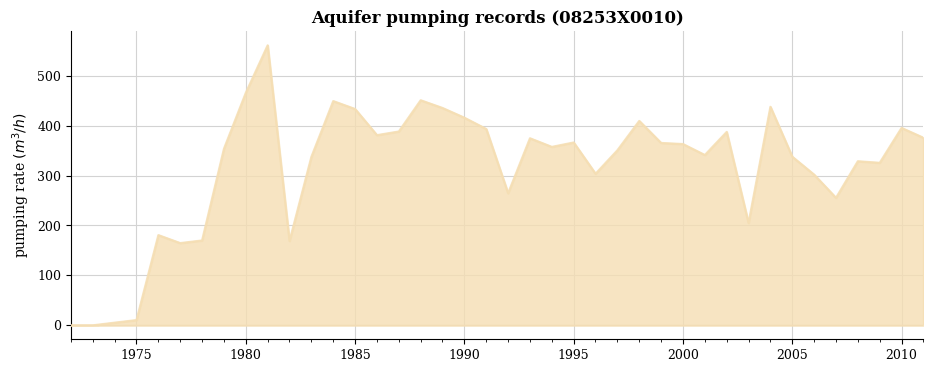

In [766]:
# -- Plot pumping records of boundname
ax = (
    mp.get_data(boundname='08253X0010')
    .set_index(mm.mldates)['value']
    .mul(-1) # prettier with positive values
    .plot(kind='area', figsize=(11, 4), color='#F5DEB3',
          ylabel='pumping rate $(m^3/h)$', lw=1.5, alpha=.8, fontsize=9, zorder=50)
)

# -- Add background grid
ax.grid(c='lightgrey', zorder=20)

# -- Add title
ax.set_title('Aquifer pumping records (08253X0010)', fontsize=12, fontweight='bold')

# -- Remove top, right axis
ax.spines[['top', 'right']].set_visible(False)

Setting values works exactly the same as basic `getter` except that the user has to define a **specific value** to set. Consider using the `.set_data()` method.

In [770]:
# -- Set pumping rate to 0 to the 10 first time step of well 08253X0010
mp.set_data(value=0, istep=np.arange(10), boundname='08253X0010')

# -- See results
mp.get_data(istep=np.arange(15), boundname='08253X0010')

istep   node  layer   i   j   value   boundname
23         0  85709      4  67  17    0.00  08253X0010
2493       1  85709      4  67  17    0.00  08253X0010
4963       2  85709      4  67  17    0.00  08253X0010
7433       3  85709      4  67  17    0.00  08253X0010
9903       4  85709      4  67  17    0.00  08253X0010
12373      5  85709      4  67  17    0.00  08253X0010
14843      6  85709      4  67  17    0.00  08253X0010
17313      7  85709      4  67  17    0.00  08253X0010
19783      8  85709      4  67  17    0.00  08253X0010
22253      9  85709      4  67  17    0.00  08253X0010
24723     10  85709      4  67  17 -168.89  08253X0010
27193     11  85709      4  67  17 -337.59  08253X0010
29663     12  85709      4  67  17 -449.37  08253X0010
32133     13  85709      4  67  17 -433.49  08253X0010
34603     14  85709      4  67  17 -381.10  08253X0010

## 👉 Write pumping data

As all properties in `PyMarthe`, the `MarthePump` instance has the ability to write back the pumping data in classic **Marthe** format. In fact, `MarthePump` will **split** pumping data according to each implementation types (`.split_qtype()`) and use a specific `writer` (`._write_listm()`, `.write_record()`, `.write_mail()`) for each implementation type.

In [780]:
# -- Split pumping data according to their type of impelmentation in Marthe
mail_df, record_df, listm_df = mp.split_qtype()

# -- Print each type
print(mail_df.head())
print(record_df.head())
print(listm_df.head())

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   istep   node  layer    i   j  value      boundname   
0      0  35533      1  112  13    0.0  aqpump_035533  \
1      0  31686      1   86  14    0.0  aqpump_031686   
2      0  34350      1  104  14    0.0  aqpump_034350   
3      0  34646      1  106  14    0.0  aqpump_034646   
4      0  55810      2  121  14    0.0  aqpump_055810   

                      qfilename  qtype qrow qcol  
0  monav3\mona.deb\mona1972.txt  listm    0    0  
1  monav3\mona.deb\mona1972.txt  listm    1    0  
2  monav3\mona.deb\mona1972.txt  listm    2    0  
3  monav3\mona.deb\mona1972.txt  listm    3    0  
4  monav3\mona.deb\mona1972.txt  listm    4    0  


In [ ]:
# -- Write pumping data change inplace
# mp.write_data() # Uncomment to actually performing the changes

# 📈 **Marthe model outputs** 📈

## 👉 `MartheFieldSeries` instance

While running a **Marthe** model, if provided in the _.pastp_ file, some fields will be **simulated** and **saved** (currently in the _chamsim.out_ file).<br>
For **post-processing purpose**, the `MartheFieldSeries` class can be called to manipulate these series of simulated fields. The `MartheFieldSeries` constructor will read and collect all `MartheGrid` instances for a each available simulated fields.

### ☛ Basic loading & attributes

Let's try to load **simulated heads** from the **MONA** model.

In [793]:
# -- Set output simulated file
chasim = os.path.join(mm.mldir, 'chasim_cal_histo.out')

# -- Build a MartheFieldseries instance
mfs = MartheFieldSeries(mm=mm, chasim=chasim)

# -- Print informations
print('\t', mfs, '\n', '-'*30)
print('Available simulated saved field:', mfs.fields)
print('Current loaded fields:', mfs.data)
print('Simulated fields file indexer:\n', mfs.indexer.head())

	 MartheFieldSeries 
 ------------------------------
Available simulated saved field: ['CHARGE']
Current loaded fields: {'CHARGE': None}
Simulated fields file indexer:
     field  istep   start     end
0  CHARGE      0       0  107671
1  CHARGE      0  107672  214506
2  CHARGE      0  214507  324730
3  CHARGE      0  324731  438378
4  CHARGE      0  438379  551776


The `.indexer` attribut is a basic `DataFrame` that store the first and last line indexes of each `MartheGrid` instance contained in the output simulated file. It comes from the reader `marthe_utils.get_chasim_indexer()`. This **indexer** is extremly usefull as it allows the user to actually **load** specific simulated field on required **time steps**. 

In [796]:
# -- Load head data every 2 time steps
mfs.load_field('CHARGE', istep=np.arange(0, mm.nstep, 2))

# -- See loaded fields
mfs.data

Extract `CHARGE` MartheGrid instances ...
Convert `CHARGE` to MartheField instances ...
[==================================================] 100%

{'CHARGE': {0: <pymarthe.mfield.MartheField at 0x1689c420100>,
  2: <pymarthe.mfield.MartheField at 0x1689c420be0>,
  4: <pymarthe.mfield.MartheField at 0x1689c4218d0>,
  6: <pymarthe.mfield.MartheField at 0x1689c4212a0>,
  8: <pymarthe.mfield.MartheField at 0x1689c421720>,
  10: <pymarthe.mfield.MartheField at 0x1689c422f80>,
  12: <pymarthe.mfield.MartheField at 0x1689ce076d0>,
  14: <pymarthe.mfield.MartheField at 0x1689ce05c60>,
  16: <pymarthe.mfield.MartheField at 0x1689ce060b0>,
  18: <pymarthe.mfield.MartheField at 0x1689c423370>,
  20: <pymarthe.mfield.MartheField at 0x1689ce17310>,
  22: <pymarthe.mfield.MartheField at 0x1689ce15660>,
  24: <pymarthe.mfield.MartheField at 0x1689ce16f20>,
  26: <pymarthe.mfield.MartheField at 0x1689ce15cc0>,
  28: <pymarthe.mfield.MartheField at 0x1689ce159f0>,
  30: <pymarthe.mfield.MartheField at 0x1689ce14ac0>,
  32: <pymarthe.mfield.MartheField at 0x1689c471480>,
  34: <pymarthe.mfield.MartheField at 0x1689c470640>,
  36: <pymarthe.mfield.

<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> when trying to load a simulated field, make sure to query the <b>exact field name</b> as written in the <i>chasim.out</i> file (case sensitive). According to the <b>Marthe</b> executable version, <b>heads field name</b> can be <code>CHARGE</code>, <code>CHARG</code>, <code>Charge</code>, ... To avoid mistakes, don't hesitate to refer to the <code>.fields</code> attribute to find out which <b>exact field names</b> to use.
</div>

For each required time steps, the corresponding **head fields** had been loaded as a `Marthefield` instance! Let's now load all available head fields.

In [799]:
# -- Load heads fields for all available time steps
mfs.load_field('CHARGE')

# -- See loaded heads field
mfs.data

Extract `CHARGE` MartheGrid instances ...
Convert `CHARGE` to MartheField instances ...
[==================================================] 100%

{'CHARGE': {0: <pymarthe.mfield.MartheField at 0x1689c49c7f0>,
  1: <pymarthe.mfield.MartheField at 0x1689c473c40>,
  2: <pymarthe.mfield.MartheField at 0x1689c4730d0>,
  3: <pymarthe.mfield.MartheField at 0x1689c473d30>,
  4: <pymarthe.mfield.MartheField at 0x1689c470fd0>,
  5: <pymarthe.mfield.MartheField at 0x1689c472200>,
  6: <pymarthe.mfield.MartheField at 0x1689c4714e0>,
  7: <pymarthe.mfield.MartheField at 0x1689c473a30>,
  8: <pymarthe.mfield.MartheField at 0x1689c4695a0>,
  9: <pymarthe.mfield.MartheField at 0x1689c46a5f0>,
  10: <pymarthe.mfield.MartheField at 0x1689c46b040>,
  11: <pymarthe.mfield.MartheField at 0x1689c46ba90>,
  12: <pymarthe.mfield.MartheField at 0x1689c472a40>,
  13: <pymarthe.mfield.MartheField at 0x1689c4b0d30>,
  14: <pymarthe.mfield.MartheField at 0x1689c4b1930>,
  15: <pymarthe.mfield.MartheField at 0x1689c4b26e0>,
  16: <pymarthe.mfield.MartheField at 0x1689c4b33d0>,
  17: <pymarthe.mfield.MartheField at 0x1689c4b3370>,
  18: <pymarthe.mfield.Marth

### ☛ Reach simulated records

The `MartheFieldSeries` has the ability to extract the **simulated time series** of one or more points defined by _x-y-layer_ coordinates using the `.get_tseries()` method.

In [804]:
# -- Fetch some points from a shapefile
shpname = os.path.join(mm.mldir, 'gis', 'sim_points.shp')
shp_df = shp_utils.read_shapefile(shpname)

# -- Extract xy-coordinates
x, y = zip(*shp_df.coords.explode())

In [810]:
# -- Get a single point time serie
ts = mfs.get_tseries(field='CHARGE', x=x[0], y=y[0], layer=5)

# -- Print results
ts.head()

C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: invalid value encountered in divide
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: divide by zero encountered in divide


60i_36j_5k
date                  
1972-12-31   -12.00572
1973-12-31   -15.90278
1974-12-31   -14.94196
1975-12-31   -14.83207
1976-12-31   -17.82381

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;"> <br>
        ➼ a <b>generic name</b> will be assign to each required points according to its <b>row</b> (<i>i</i>), <b>columns</b> (<i>j</i>) and <b>layer</b> (<i>k</i>). Set the <code>names</code> attribute to set a custom name<br>
        ➼ by default, the output <code>DataFrame</code> index will be in <b>date</b> format. Feel free to set the <code>index</code> attribute to <code>istep</code> or <code>both</code> if required.
    </span>
</div>

In [814]:
# -- Get time series on multiple points (istep index)
ts = mfs.get_tseries('CHARGE', x, y, layer=5, names=shp_df['ID'], index='istep')

# -- See results
ts.head()

C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: invalid value encountered in divide
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: divide by zero encountered in divide


ID        rec_1     rec_2     rec_3     rec_4     rec_5     rec_6     rec_7   
istep                                                                         
0     -12.00572 -10.97135  4.361517  15.60132  5.472691  16.75396  17.97181  \
1     -15.90278 -13.44065  2.962007  14.10842  3.073630  15.47156  17.60689   
2     -14.94196 -12.14409  3.289968  13.65978  2.997388  15.39930  17.45791   
3     -14.83207 -11.94304  3.083741  13.13329  3.103123  14.98058  17.16066   
4     -17.82381 -15.88896  1.789790  11.68072  0.741634  14.01469  16.97212   

ID         rec_8     rec_9     rec_10    rec_11  
istep                                            
0      -9.963381  -8.75526  -4.881387  15.01821  
1     -14.716770 -12.74079  -9.188774  14.33385  
2     -13.389650 -11.87789  -8.710926  14.37983  
3     -13.700940 -12.05455  -9.909184  14.23867  
4     -16.440750 -14.56214 -11.428290  13.63480

In [840]:
# Plot simulated heads records
ts = mfs.get_tseries('CHARGE', x[:3], y[:3], layer=4, names=shp_df['ID'][:3], index='date')

C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: invalid value encountered in divide
C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\utils\shp_utils.py:96: RuntimeWarning: divide by zero encountered in divide


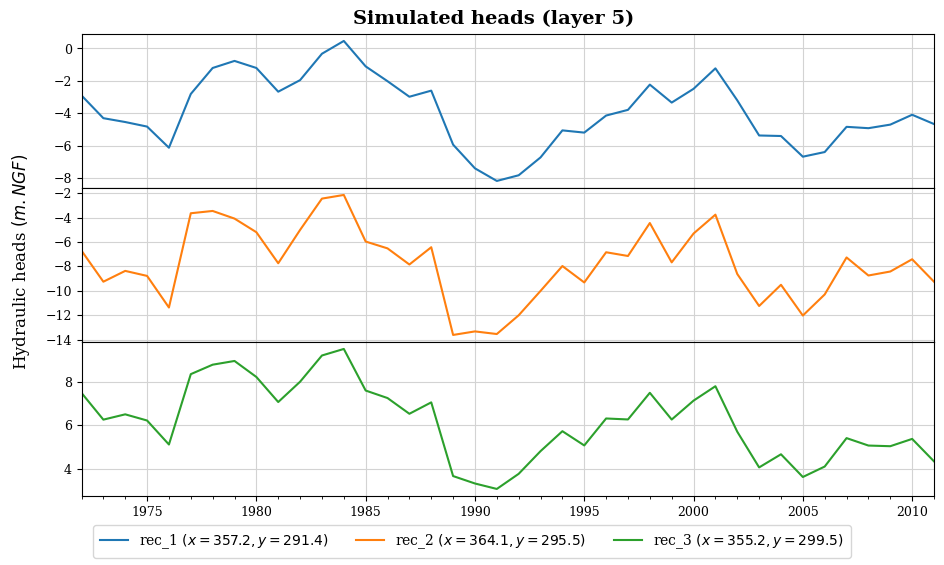

In [924]:
# -- Set font family
plt.rc('font', family='serif')

# -- Make subplots
axs = (
    ts
    .plot( figsize=(11, 6), subplots=True, xlabel='',
          ylabel='', fontsize=9, sharex=True, legend=False)
)

# -- Add common ylabel
axs[0].get_figure().supylabel('Hydraulic heads $(m.NGF)$', x=0.06, size=12)

# -- Adjust subplots height space
plt.subplots_adjust(hspace=0)

# -- Add background grid
for ax in axs:
    ax.grid(c='lightgrey')
    
# -- Add title
plt.suptitle("Simulated heads (layer 5)", y=0.92, size=14, weight='bold')

# -- Add legend
lines = [ax.get_lines()[0] for ax in axs]
labels = shp_df.iloc[:3].apply(lambda x: '{} $(x={:.1f}, y={:.1f})$'.format(x.ID, *x.coords[0]), axis=1)
plt.figlegend(lines, labels, loc = 'lower center', fontsize=10, ncol=3, borderpad=.5)

### ☛ Build animation

Another post-processing tool of `MartheFieldSeries` allows to save _.gif_ animations to see the evolution of field values in a given layer. To do so, consider using the `.save_animation()` method.<br>

The user can manage the **frame rate** and **resolution** of the animation with the following arguments:
- `dpf` : duration per frame 
- `dpi` : dot per inch


It supports all **kwargs** from `MartheField.plot()` method such as `cmap`, `vmin`, `vmax`, `extent`, ...

In [941]:
# -- Set animation output path
gif = os.path.join(mm.mldir, 'export', 'heads5_animation.gif')

# -- Saving animation
plt.style.use('dark_background')
plt.rcParams['figure.max_open_warning'] = 50
mfs.save_animation(field='CHARGE', filename=gif, dpf=0.2, dpi=200,
                   layer=5, vmin=-50, vmax=150, cmap='jet',
                   extent=(300, 210, 490, 380))
plt.style.use('default')

Building animation of simulated `CHARGE`:
[=========================                         ] 50%

C:\Users\pierr\OneDrive\Documents\dev\adeqwat\examples\..\pymarthe\mfield.py:820: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


[==================================================] 100%
Animation written in monav3\export\heads5_animation.gif.


<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> building animation required the additional <code>imageo</code> library. Make sure to install it properly (<code>!pip install imageo</code>)</span>
</div>

Let's see the animation results by using the `IPython.display` module.

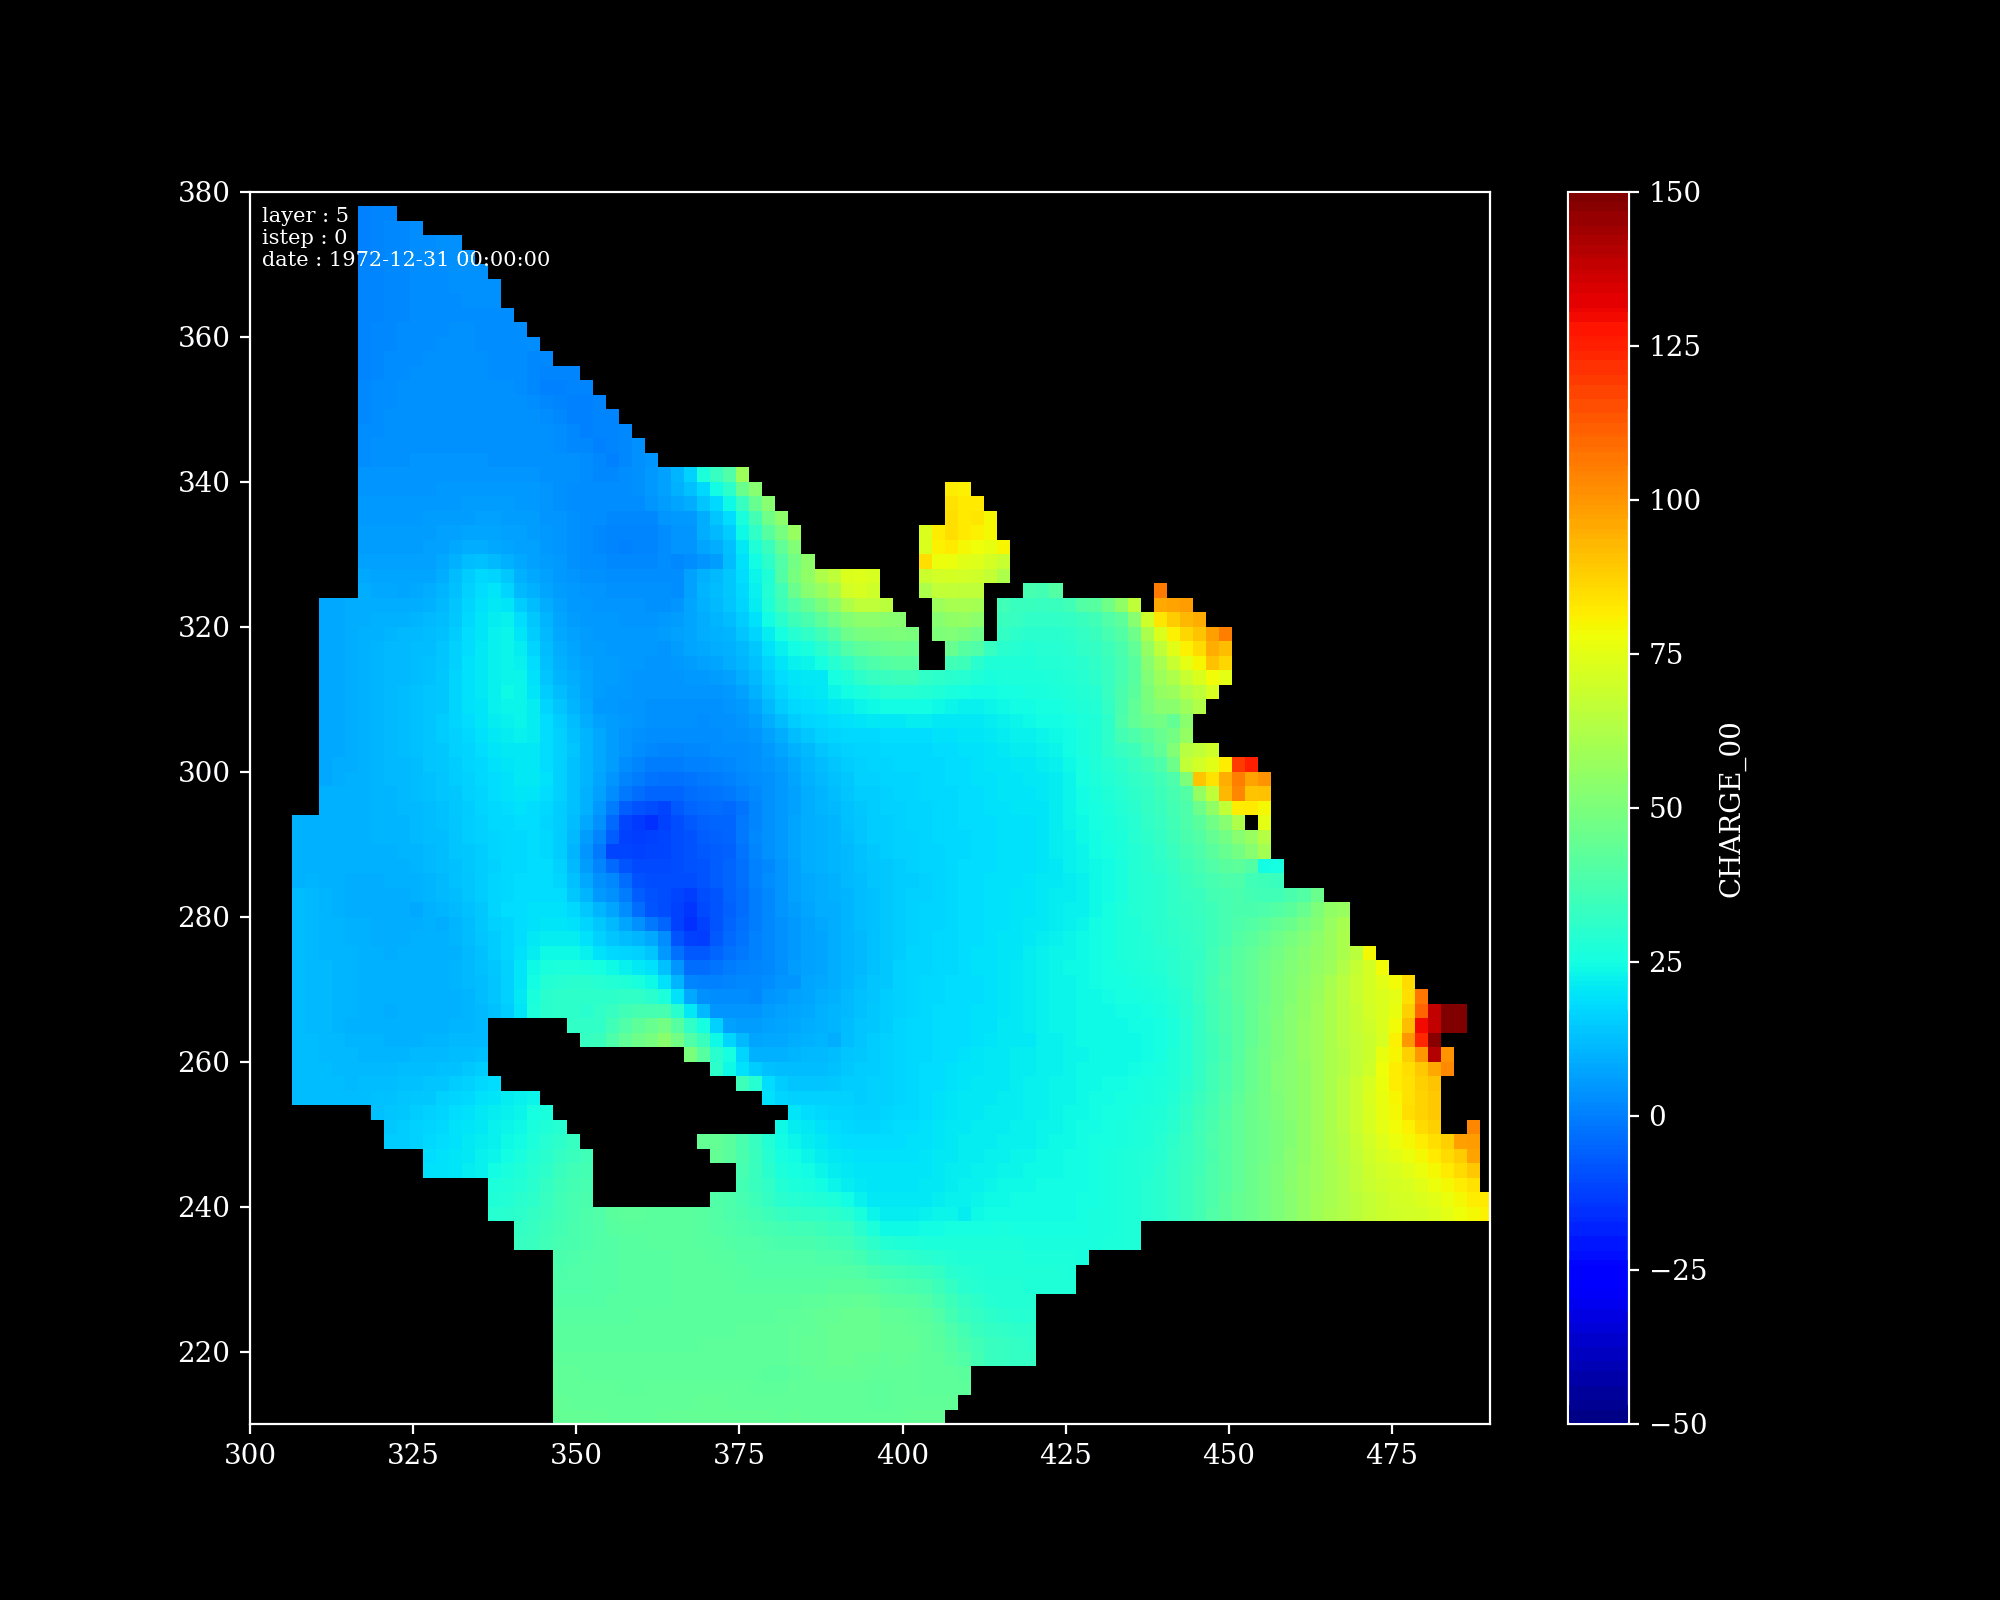

In [948]:
# -- Import Image reader
from IPython.display import Image

# -- Display gif
Image(gif)

### ☛ Vectorial exports

`MartheFieldSeries` allows the **vectorial exports** of a simulated fiel in shapefile format for a given layer. To do so, consider using the `.to_shapefile()` method. It will save **non masked cell** of a given layer with all field informations (_layer_, _inest_, ...) but also the values of each **simulated field** (one per column).

In [950]:
# -- Set output filename
shpname = os.path.join('monav3', 'export', 'heads_09.shp')

# -- Export to shapefile object
mfs.to_shapefile('CHARGE', shpname, layer=9)

No CRS information for writing a .prj file.
Supply an epsg code or .prj file path to the model spatial reference or .export() method.(writing .prj files from proj4 strings not supported)


<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> shapefile <b>column names</b> are restricted to <b>10 characters</b>. Some larger field names will be automatically truncated.</span>
</div>

In [956]:
# -- Read just created shapefile
shp_df = shp_utils.read_shapefile(shpname)

# -- Show data
shp_df.sample(3)

layer  inest   i   j      x      y  CHARGE_00  CHARGE_01  CHARGE_02   
1878      9      0  42  43  371.5  327.0   24.51571   24.35546   24.36535  \
2901      9      0  53  54  393.5  305.0   38.09777   38.01646   38.09612   
5478      9      0  81  87  459.5  249.0   52.00995   52.00132   51.99122   

      CHARGE_03  ...  CHARGE_31  CHARGE_32  CHARGE_33  CHARGE_34  CHARGE_35   
1878   24.32330  ...   22.31845   21.98137   21.50879   21.17722   21.03394  \
2901   38.07975  ...   34.52663   34.31218   33.70424   33.43425   33.34499   
5478   51.97745  ...   35.36980   34.60173   33.81059   33.16579   32.61841   

      CHARGE_36  CHARGE_37  CHARGE_38  CHARGE_39   
1878   20.85879   20.74094   20.70937   20.59142  \
2901   33.11818   33.00071   32.98486   32.75291   
5478   32.21791   31.91958   31.62125   31.39497   

                                                                                coords  
1878  [(370.5, 326.0), (370.5, 328.0), (372.5, 328.0), (372.5, 326.0), (370.5, 326.0)]  
2901  [(392.5, 304.0), (392.5, 306.0), (394.5, 306.0), (394.5, 304.0), (392.5, 304.0)]  
5478  [(458.5, 248.0), (458.5, 250.0), (460.5, 250.0), (460.5, 248.0), (458.5, 248.0)]  

[3 rows x 47 columns]

## 👉 Observation records

In **Marthe** models, the user can specific **geolocated observation points** and a **monitoring variable** (e.g. _heads_, _aquifer saturation ratio_, _etc._) in the _.histo_ file. Once the model has been run, the **Marthe** software will automatically generate an output file _historiq.prn_ with the **historical values** of the variables selected at the **observation points**.<br>

`PyMarthe` brings some `readers` of these files to make them easier to use.

In [957]:
# -- Read the .histo file
histo_df = marthe_utils.read_histo_file(mm.mlfiles['histo'])

# -- Show results
histo_df.head(5)

type  inest loc_type       x       y  layer       label
id                                                                  
07545X0029  CHARG      0      xyz  333.39  330.49      1     HOURTIN
07786X0087  CHARG      0      xyz  344.59  308.66      1       BRACH
08022X0004  CHARG      0      xyz  337.50  296.48      1      SAUMOS
08022X0013  CHARG      0      xyz  338.68  300.56      1  STE HELENE
08025X0009  CHARG      0      xyz  336.87  291.80      1   LE TEMPLE

In [958]:
# -- Read the observation output records
prn_df = marthe_utils.read_prn(os.path.join(mm.mldir, 'historiq.prn'))

# -- Show results
prn_df.head(5)

type           Charge                                                          
name       07545X0029 07786X0087 08022X0004 08022X0013 08025X0009 08262X0023   
date                                                                           
1972-12-31   16.01398   34.48365   30.51000   30.53488   32.87625   42.20754  \
1973-12-31   16.01398   34.48365   30.50995   30.53176   32.87335   42.16739   
1974-12-31   16.01398   34.48365   30.50995   30.53484   32.87622   42.20156   
1975-12-31   16.01398   34.48365   30.50995   30.52829   32.85871   42.07087   
1976-12-31   16.01398   34.48365   30.50995   30.53486   32.87623   42.14328   

type                                                    ...              
name       08262X0290 08264X0086 08266X0003 08266X0136  ... 08087X0021   
date                                                    ...              
1972-12-31   43.13680   54.15925   25.58153   17.41750  ...   87.12905  \
1973-12-31   43.09539   54.14075   25.58148   17.41745  ...   87.12618   
1974-12-31   43.13145   54.15823   25.58148   17.41745  ...   87.12382   
1975-12-31   42.99615   54.07042   25.58148   17.41745  ...   87.12164   
1976-12-31   43.07305   54.12355   25.58148   17.41745  ...   87.11979   

type                                                                           
name       07588X0048 07597X0006 07598X0004 07598X0005 07598X0007 07834X0012   
date                                                                           
1972-12-31   84.99441   113.8735   151.2511   155.0546   148.9145   122.1192  \
1973-12-31   84.99260   113.8721   151.2576   155.0612   148.9212   122.1188   
1974-12-31   85.01190   113.8757   151.2768   155.0800   148.9419   122.1221   
1975-12-31   85.02271   113.8775   151.2764   155.0797   148.9414   122.1223   
1976-12-31   85.04121   113.8816   151.2819   155.0850   148.9472   122.1238   

type                                         
name       09042X0001 08797X0205 08797X0205  
date                                         
1972-12-31   111.5406   66.61139   64.51919  
1973-12-31   111.5400   66.61005   64.51678  
1974-12-31   111.5398   66.60905   64.51677  
1975-12-31   111.5399   66.60815   64.51593  
1976-12-31   111.5400   66.60730   64.51512  

[5 rows x 453 columns]

Let's try to plot observation points records located in the `ANDERNOS` area.

Text(0.5, 1.0, 'Simulated hydraulic heads (ANDERNOS)')

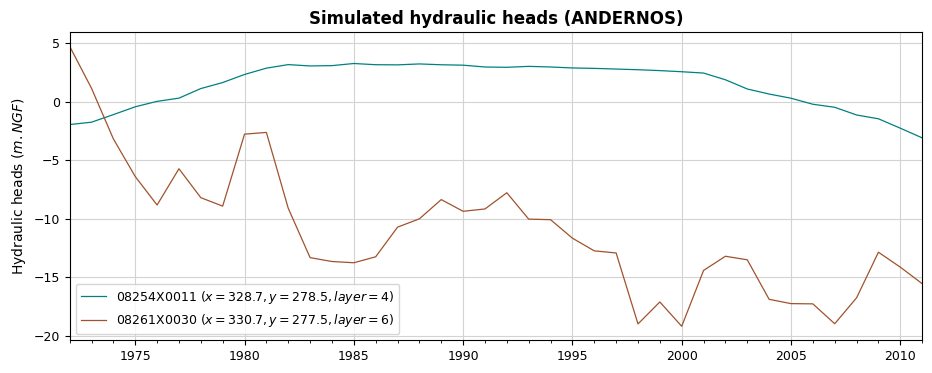

In [1046]:
# -- Set observation points names
obs_names = histo_df[histo_df.label == 'ANDERNOS'].index.to_list()

# -- Plot the head records
ax = (
    prn_df
    .xs(key='Charge', axis=1)
    .loc[:, obs_names]
    .plot(figsize=(11, 4), xlabel='', ylabel='Hydraulic heads $(m.NGF)$',
          lw=.9, fontsize=9, color=['#008080', '#A0522D'], legend=False)
)

# -- Add grid background
ax.grid(c='lightgrey')

# -- Add custom legend
labels = (
    histo_df
    .loc[obs_names]
    .reset_index()
    .apply(lambda x:
           '{} $(x={:.1f}, y={:.1f}, layer={})$'.format(x.id, x.x, x.y, x.layer),
           axis=1)
    .to_list()
)
ax.legend(ax.get_lines(), labels, fontsize=9)

# -- Add title
ax.set_title('Simulated hydraulic heads (ANDERNOS)',
             fontsize=12, fontweight='bold')

## 👉 Budgets

`PyMarthe` provide a bunch of _utils_ to read **Marthe** output **budget files**. These `readers` return comprehensive `DataFrame` with time steps index.

➤ **Aquifer budget by timesteps** &nbsp;&nbsp;&nbsp;➼ `histobil_nap_pastp.prn`<br>
➤ **Cumulative aquifer budgets** &nbsp;&nbsp;&nbsp;➼ `histobil_nap_cumu.prn`<br>
➤ **Climatic budget** &nbsp;&nbsp;&nbsp;➼ `histoclim.prn`<br>
➤ **(Zonal) Flow budget** &nbsp;&nbsp;&nbsp;➼ `histobil_debit.prn`<br>


### ☛ Aquifer volume budget

In [502]:
# -- Read aquifer budget (cumulative)
filename = os.path.join('monav3', 'histobil_nap_cumu.prn')
budget_df = marthe_utils.read_budget(filename)

# -- Summary about the budget table
budget_df.head()

Entr_Limit    Sort_Limit  Entr_Intern_fix  Sort_Intern_fix   
date                                                                       
1973-12-31  9.232628e+09 -5.956806e+09              0.0     -115350550.0  \
1974-12-31  1.842588e+10 -1.201898e+10              0.0     -232458640.0   
1975-12-31  2.767347e+10 -1.797230e+10              0.0     -352177510.0   
1976-12-31  3.688808e+10 -2.406497e+10              0.0     -481452890.0   
1977-12-31  4.612143e+10 -3.005881e+10              0.0     -605622860.0   

            Dénoy_Pompage  Désaturation   Débordement  Recharge_Maill   
date                                                                    
1973-12-31     21278573.0           0.0 -5.565374e+09    2.007558e+09  \
1974-12-31     43714523.0           0.0 -1.153311e+10    5.163850e+09   
1975-12-31     64331176.0           0.0 -1.710513e+10    7.270866e+09   
1976-12-31     84718284.0           0.0 -2.314886e+10    1.059960e+10   
1977-12-31    108977170.0           0.0 -2.887390e+10    1.317653e+10   

            Évaporat_Maill  Excès_Irrigat  ...  Nappe->Lacs  Transpir_Racin   
date                                       ...                                
1973-12-31             0.0            0.0  ...          0.0             0.0  \
1974-12-31             0.0            0.0  ...          0.0             0.0   
1975-12-31             0.0            0.0  ...          0.0             0.0   
1976-12-31             0.0            0.0  ...          0.0             0.0   
1977-12-31             0.0            0.0  ...          0.0             0.0   

            Écart_Volume  %_Écart_Volum  Glob_Limites  Glob_Intern_fix   
date                                                                     
1973-12-31  -135375640.0       1.466274  3.275822e+09     -115350550.0  \
1974-12-31  -112923840.0       0.612854  6.406903e+09     -232458640.0   
1975-12-31  -165881530.0       0.599425  9.701169e+09     -352177510.0   
1976-12-31  -116302450.0       0.315285  1.282311e+10     -481452890.0   
1977-12-31  -145823950.0       0.316174  1.606262e+10     -605622860.0   

             Glob_Stock  Glob_Riv_Nappe  Glob_Drain_Nap  Glob_Lacs_Napp  
date                                                                     
1973-12-31 -255862290.0     -15171970.0             0.0             0.0  
1974-12-31  -70239948.0     -32063479.0             0.0             0.0  
1975-12-31 -303154990.0     -48094209.0             0.0             0.0  
1976-12-31  -71748963.0     -65166282.0             0.0             0.0  
1977-12-31  -67332723.0     -81763322.0             0.0             0.0  

[5 rows x 29 columns]

The returned `DataFrame` is suitable to have a quick look on **water transfers** between hydrogeological entities over model **time window**. Let's visualize a basic example.

<p style="color:#26c9fc; font-size:1.2em;">💧<i>Global water budget</i></p>

Let's consider the following _simplified_ equation of **model annual water budget**:

<br>

<p style="text-align: center;">
  <span style="font-size: 24px; ">
    <span style="font-family: 'Times New Roman', Times, serif; font-weight: bold;">
      V<sub>IN</sub> - V<sub>OUT</sub> = ΔS
    </span>
  </span>
</p>

<p>
  <span style="font-size: 14px;">
    <i>where,</i>
  </span>
</p>

<ul>
  <li>
    <span style="font-size: 14px;">
        <b>V<sub>IN</sub></b>: <i>Total volume of water entering the model (L<sup>3</sup>)</i>
    </span>
  </li>
  <li>
    <span style="font-size: 14px;">
      <b>V<sub>OUT</sub></b>: <i>Total volume of water leaving the model (L<sup>3</sup>)</i>
    </span>
  </li>
  <li>
    <span style="font-size: 14px;">
      <b>ΔS</b>: <i>Stock variation (L<sup>3</sup>)</i>
    </span>
  </li>
</ul>

In `budget_df`, the **stock variation** (**ΔS**) corresponds to the `Écart_Volume` column. Let's visualize it's evolution over the time steps.

Text(1996, 200, '$ΔS > 0$')

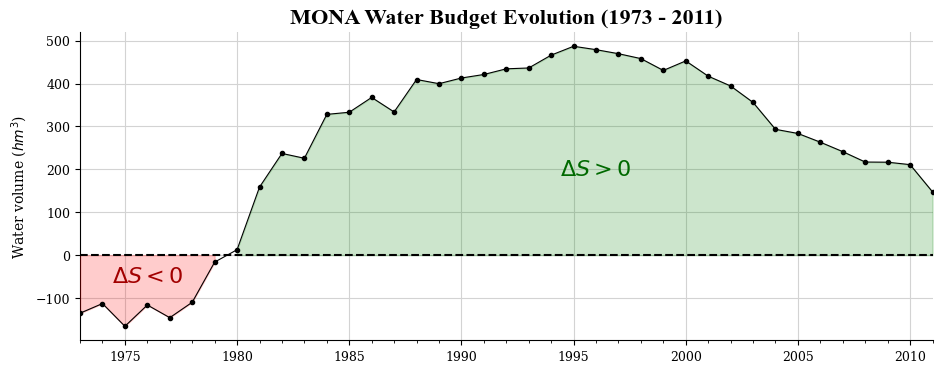

In [493]:
# -- Units conversion
wb = budget_df['Écart_Volume'].mul(1e-6) # hm^3

# -- Plot main line/marker
ax = wb.plot(figsize=(11, 4), color='k', fontsize=9,
             lw=.8, marker='o', ms=3, zorder=50,
             xlabel='', ylabel='Water volume ($hm^3$)')

# -- Add title
ax.set_title(f'MONA Water Budget Evolution ({wb.index.min().year} - {wb.index.max().year})',
            fontsize=16, fontweight='bold', fontfamily='Times New Roman')

# -- Add colored are to 0
ax.fill_between(budget_df.index, wb, where=wb.lt(0),color='red', alpha=.2, zorder=30)
ax.fill_between(budget_df.index, wb, where=wb.ge(0), color='green', alpha=.2, zorder=30)

# -- Add perfect ΔS = 0 horizontal line
ax.axhline(y=0, lw=1.5, ls='--', color='k', zorder=60)

# -- Remove top, right axis
ax.spines[['top', 'right']].set_visible(False)

# -- Add background grid
ax.grid(c='lightgrey', zorder=10)

# -- Add annual stock variation signs
opts= dict(ha='center', va='center', fontsize=16, fontweight='bold')
ax.text(x='1976', y=-50, s='$ΔS < 0$', c='darkred', **opts)
ax.text(x='1996', y=200, s='$ΔS > 0$', c='darkgreen', **opts)

### ☛ Climatic budget

In [553]:
# -- Read aquifer budget
filename = os.path.join('monav3', 'histoclim.prn')
budget_df = marthe_utils.read_budget(filename)

# -- Summary about the budget table
budget_df.head()

Température  Flux_Pluie  Flux_ETP  Flux_ETR  Fl_ETR_Sol   
date                                                                  
1972-12-31          0.0   7740282.0       0.0       0.0         0.0  \
1973-12-31          0.0   5500147.0       0.0       0.0         0.0   
1974-12-31          0.0   8647354.0       0.0       0.0         0.0   
1975-12-31          0.0   5772634.0       0.0       0.0         0.0   
1976-12-31          0.0   9094874.0       0.0       0.0         0.0   

            Transpiration  Stock_Neige  Fl_Fonte_Neige  Ruissellement   
date                                                                    
1972-12-31            0.0          0.0             0.0            0.0  \
1973-12-31            0.0          0.0             0.0            0.0   
1974-12-31            0.0          0.0             0.0            0.0   
1975-12-31            0.0          0.0             0.0            0.0   
1976-12-31            0.0          0.0             0.0            0.0   

            Infiltration  ...  Cum_ETP  Cum_ETR  Cum_ETRSol  Cum_Transpir   
date                      ...                                               
1972-12-31     7740282.0  ...      0.0      0.0         0.0           0.0  \
1973-12-31     5500147.0  ...      0.0      0.0         0.0           0.0   
1974-12-31     8647354.0  ...      0.0      0.0         0.0           0.0   
1975-12-31     5772634.0  ...      0.0      0.0         0.0           0.0   
1976-12-31     9094874.0  ...      0.0      0.0         0.0           0.0   

            Cum_Font_Neig  Cum_Ruissel.   Cum_Infiltr  Cum_Défic_Evap   
date                                                                    
1972-12-31            0.0           0.0  0.000000e+00             0.0  \
1973-12-31            0.0           0.0  2.007558e+09             0.0   
1974-12-31            0.0           0.0  5.163850e+09             0.0   
1975-12-31            0.0           0.0  7.270866e+09             0.0   
1976-12-31            0.0           0.0  1.059960e+10             0.0   

            LAI_ou_CC  Profon_Racines  
date                                   
1972-12-31        0.0             0.0  
1973-12-31        0.0             0.0  
1974-12-31        0.0             0.0  
1975-12-31        0.0             0.0  
1976-12-31        0.0             0.0  

[5 rows x 25 columns]

### ☛ Global flow budget

In [508]:
# -- Read flow budgets
filename = os.path.join('monav3', 'histobil_debit.prn')
flow_df, riv_df, cum_riv_df = marthe_utils.read_budget(filename)

<div class="alert alert-info" role="alert">
    <span style="color: blue; font-size: 16px; font-weight: bold;">✔ NOTE: </span>
    <span style="color: darkblue;">even though the <b>flow budget</b> file (<code>histobil_debit.prn</code>) contains several kind of budgets (<i><b>global flow</b></i>, <i><b>river flow</b></i> and <i><b>cumulative river flow</b></i>) the user can still use the same basic <code>marthe_utils.read_budget()</code> function. A <code>tuple</code> of <code>DataFrame</code> will be returned.
    </span>
</div>

In [504]:
# -- Summary about the aquifer flow budget table
flow_df.head()

Entr_Limit  Sort_Limit  Entr_Intern_fix  Sort_Intern_fix   
date                                                                   
1972-12-31  25189565.0 -16523782.0              0.0        -305187.5  \
1973-12-31  25294814.0 -16319979.0              0.0        -316028.2   
1974-12-31  25186950.0 -16608665.0              0.0        -320843.4   
1975-12-31  25335782.0 -16310417.0              0.0        -327996.2   
1976-12-31  25176482.0 -16646614.0              0.0        -353210.6   

            Dénoy_Pompage  Désaturation  Débord/Suintem  Recharge_Maill   
date                                                                      
1972-12-31       62833.84           0.0     -16120185.0       7740282.0  \
1973-12-31       58297.33           0.0     -15247567.0       5500147.0   
1974-12-31       61468.22           0.0     -16349920.0       8647354.0   
1975-12-31       56483.85           0.0     -15265778.0       5772634.0   
1976-12-31       55702.36           0.0     -16512871.0       9094874.0   

            Évaporat_Maill  Excès_Irrigat  ...  d_BilQ_Global  d_BilQ<->QFixé   
date                                       ...                                  
1972-12-31             0.0            0.0  ...      -50462.83      -113641.40  \
1973-12-31             0.0            0.0  ...     -404375.70      -370891.30   
1974-12-31             0.0            0.0  ...       62493.07        61511.63   
1975-12-31             0.0            0.0  ...     -144699.60      -145089.20   
1976-12-31             0.0            0.0  ...      134487.60       135461.70   

            Glob_Drain_Napp  Glob_Lacs_Nappe  d_BilanVol_Pas  %_Non_CV_Gl_Pas   
date                                                                            
1972-12-31              0.0              0.0       -113641.4         0.451145  \
1973-12-31              0.0              0.0    -135375640.0         1.466274   
1974-12-31              0.0              0.0      22451795.0         0.244220   
1975-12-31              0.0              0.0     -52957683.0         0.572665   
1976-12-31              0.0              0.0      49579082.0         0.538048   

            Nombre_Désatur  Nombre_Suintem  Nombre_Itérat  Nombre_Sous-pas  
date                                                                        
1972-12-31          1331.0          1803.0          100.0              1.0  
1973-12-31          1329.0          1673.0           60.0              1.0  
1974-12-31          1273.0          1755.0           60.0              1.0  
1975-12-31          1285.0          1695.0           60.0              1.0  
1976-12-31          1264.0          1756.0           60.0              1.0  

[5 rows x 38 columns]

In [505]:
# -- Summary about the river flow budget table
riv_df.head()

Par Sources  Ruissel_Sup  Entr_Intern  Sort_Intern   
date                                                             
1972-12-31          0.0          0.0          0.0          0.0  \
1973-12-31          0.0          0.0          0.0          0.0   
1974-12-31          0.0          0.0          0.0          0.0   
1975-12-31          0.0          0.0          0.0          0.0   
1976-12-31          0.0          0.0          0.0          0.0   

            Entr_Intern_fix  Sort_Intern_fix  Dérivat_Entr  Dérivat_Sort   
date                                                                       
1972-12-31              0.0              0.0           0.0           0.0  \
1973-12-31              0.0              0.0           0.0           0.0   
1974-12-31              0.0              0.0           0.0           0.0   
1975-12-31              0.0              0.0           0.0           0.0   
1976-12-31              0.0              0.0           0.0           0.0   

            Entr_Niv_Impos  Sort_Niv_Impos  Nappe->Rivières  Rivières->Nappe   
date                                                                           
1972-12-31             0.0             0.0        158219.80        -1051.697  \
1973-12-31             0.0             0.0         44513.81        -2946.866   
1974-12-31             0.0             0.0         48375.85        -2097.848   
1975-12-31             0.0             0.0         45862.12        -1942.404   
1976-12-31             0.0             0.0         48661.43        -2016.530   

            Lacs->Rivières  Rivières->Lacs  Débo_Nap_Rivi.   Exutoires   
date                                                                     
1972-12-31             0.0             0.0      16120185.0  16272882.0  \
1973-12-31             0.0             0.0      15247567.0  15263266.0   
1974-12-31             0.0             0.0      16349920.0  16367189.0   
1975-12-31             0.0             0.0      15265778.0  15284484.0   
1976-12-31             0.0             0.0      16512871.0  16532260.0   

            Stockage  DéStockage  Écart_Bilan  
date                                           
1972-12-31       0.0         0.0      4470.68  
1973-12-31       0.0         0.0     25867.35  
1974-12-31       0.0         0.0     29009.18  
1975-12-31       0.0         0.0     25213.83  
1976-12-31       0.0         0.0     27256.39

In [507]:
# -- Summary about the river flow budget (cumulative) table
cum_riv_df.head()

Par Sources  Ruissel_Sup  Entr_Intern  Sort_Intern   
date                                                             
1972-12-31          0.0          0.0          0.0          0.0  \
1973-12-31          0.0          0.0          0.0          0.0   
1974-12-31          0.0          0.0          0.0          0.0   
1975-12-31          0.0          0.0          0.0          0.0   
1976-12-31          0.0          0.0          0.0          0.0   

            Entr_Intern_fix  Sort_Intern_fix  Dérivat_Entr  Dérivat_Sort   
date                                                                       
1972-12-31              0.0              0.0           0.0           0.0  \
1973-12-31              0.0              0.0           0.0           0.0   
1974-12-31              0.0              0.0           0.0           0.0   
1975-12-31              0.0              0.0           0.0           0.0   
1976-12-31              0.0              0.0           0.0           0.0   

            Entr_Niv_Impos  Sort_Niv_Impos  Nappe->Rivières  Rivières->Nappe   
date                                                                           
1972-12-31             0.0             0.0              0.0              0.0  \
1973-12-31             0.0             0.0       16247578.0       -1075609.0   
1974-12-31             0.0             0.0       33904803.0       -1841325.0   
1975-12-31             0.0             0.0       50644513.0       -2550304.0   
1976-12-31             0.0             0.0       68454637.0       -3288356.0   

            Lacs->Rivières  Rivières->Lacs  Débo_Nap_Rivi.     Exutoires   
date                                                                       
1972-12-31             0.0             0.0    0.000000e+00  0.000000e+00  \
1973-12-31             0.0             0.0    5.565374e+09  5.571105e+09   
1974-12-31             0.0             0.0    1.153311e+10  1.154514e+10   
1975-12-31             0.0             0.0    1.710513e+10  1.712399e+10   
1976-12-31             0.0             0.0    2.314886e+10  2.317481e+10   

            Stockage  DéStockage  Écart_Bilan  
date                                           
1972-12-31       0.0         0.0          0.0  
1973-12-31       0.0         0.0    9441602.0  
1974-12-31       0.0         0.0   20029976.0  
1975-12-31       0.0         0.0   29233045.0  
1976-12-31       0.0         0.0   39208905.0

### ☛ Zonal flow budget

`PyMarthe` also has the capacity to read **zonal flow budget** using the `marthe_utils.read_zonebudget()` function. The resulting table corresponds to a `DataFrame` with `MultiIndex` rows containing both `zone` _(level 0)_ and `date` _(level 1)_ informations.

In [478]:
# -- Read zonal flow budget
filename = os.path.join('monav3', 'histobil_debit.prn')
zb_df = marthe_utils.read_zonebudget(filename)

# -- Summary about the zonal budget
zb_df.sample(5)

Entr_Limit_ext  Sort_Limit_ext  Glob_Limit_ext   
zone date                                                         
347  1976-12-31             0.0             0.0            0.00  \
204  1991-12-31             0.0             0.0            0.00   
703  2002-12-31             0.0             0.0            0.00   
800  1977-12-31       3733584.0      -3720640.0        12943.96   
624  1999-12-31             0.0             0.0            0.00   

                 Entr_Limit_Zon  Sort_Limit_Zon  Glob_Limit_Zon   
zone date                                                         
347  1976-12-31        5126.465        -3910.65       1215.8160  \
204  1991-12-31      144212.300      -110732.20      33480.1000   
703  2002-12-31       15338.740       -15904.67       -565.9299   
800  1977-12-31      963651.500      -976554.30     -12902.8700   
624  1999-12-31       34783.410       -31793.59       2989.8280   

                 Entr_Intern_fix  Sort_Intern_fix  Glob_Intern_fix   
zone date                                                            
347  1976-12-31              0.0          -158.79          -158.79  \
204  1991-12-31              0.0        -15834.03        -15834.03   
703  2002-12-31              0.0             0.00             0.00   
800  1977-12-31              0.0            -0.95            -0.95   
624  1999-12-31              0.0        -21798.29        -21798.29   

                 Dénoy_Pompage  ...  Éch_Phas_Négat  Glob_Éch_Phase   
zone date                       ...                                   
347  1976-12-31         0.0000  ...             0.0             0.0  \
204  1991-12-31      2274.1810  ...             0.0             0.0   
703  2002-12-31         0.0000  ...             0.0             0.0   
800  1977-12-31         0.0000  ...             0.0             0.0   
624  1999-12-31       221.1154  ...             0.0             0.0   

                     Stockage  Somme=Bil_Glob.  Entr_Lim_Z_Hau   
zone date                                                        
347  1976-12-31   -203.970800        -0.336988      3625.25300  \
204  1991-12-31    -10.232740      2173.285000    128990.90000   
703  2002-12-31   -563.585000        -2.344859        41.86781   
800  1977-12-31      4.977381        35.158240       104.57130   
624  1999-12-31  16362.910000     -1497.013000     24567.34000   

                 Sort_Lim_Z_Hau  Glob_Lim_Z_Hau  Entr_Lim_Z_Bas   
zone date                                                         
347  1976-12-31       -222.5879        3402.665        142.4576  \
204  1991-12-31     -19707.8800      109283.000       1495.7870   
703  2002-12-31      -1167.3730       -1125.505        138.0694   
800  1977-12-31      -3279.0980       -3174.527        127.8446   
624  1999-12-31      -7681.0540       16886.280       4515.2920   

                 Sort_Lim_Z_Bas Glob_Lim_Z_Bas  
zone date                                       
347  1976-12-31       -2815.500    -2673.04200  
204  1991-12-31      -59214.330   -57718.55000  
703  2002-12-31       -4670.179    -4532.11000  
800  1977-12-31       -1036.727     -908.88280  
624  1999-12-31       -4609.446      -94.15338  

[5 rows x 40 columns]

Since **zonal budget** is `MultiIndex` row-based, all the classic **slicing processes** become trickier. For first-time users let's have a look on **3 different ways** to carry out a basic `MultiIndex` slicing.
<br>
Let's imagine we want to extract the _**inflow / outflow**_ (at the zone limit) of _**zone**_ `401` within a specific _**time window**_.

In [479]:
# -- Set required variables
start, end = '1975-12-31', '1980-12-31' # time window
cols = ['Entr_Limit_Zon', 'Sort_Limit_Zon'] # required flow data

<p style="color:#1fcecb; font-size:1.2em;"><i>🞂 The "<b>cross section</b>" way ⭐</i></p>

In [480]:
# -- Cross section on zone 401
zb_401_df = zb_df.xs(key=401, level='zone')

# -- Basic single index slicing
zb_401_df.loc[start:end, cols]

Entr_Limit_Zon  Sort_Limit_Zon
date                                      
1975-12-31        5270.019       -5240.029
1976-12-31        5354.464       -5432.448
1977-12-31        5309.153       -5202.949
1978-12-31        5615.116       -5306.293
1979-12-31        5701.711       -5430.625
1980-12-31        5522.988       -5555.544

<div class="alert alert-warning" role="alert">
    <span style="color: darkorange; font-size: 16px; font-weight: bold;">⚠ Warning: </span>
    <span style="color: darkorange;"> the <b><i>cross section</i></b> method works for only for single unique key</span>
</div>

<p style="color:#1fcecb; font-size:1.2em;"><i>🞂 The "<b>slice</b>" way ⭐⭐</i></p>

In [481]:
# -- Slicing using built-in slice() function 
zb_df.loc[(401, slice(start, end)), cols]

Entr_Limit_Zon  Sort_Limit_Zon
zone date                                      
401  1975-12-31        5270.019       -5240.029
     1976-12-31        5354.464       -5432.448
     1977-12-31        5309.153       -5202.949
     1978-12-31        5615.116       -5306.293
     1979-12-31        5701.711       -5430.625
     1980-12-31        5522.988       -5555.544

<p style="color:#1fcecb; font-size:1.2em;"><i>🞂 The "<b>pandastic</b>" way ⭐⭐</i></p>

In [482]:
# -- Get the pd.IndexSlice object
idx = pd.IndexSlice
zb_df.loc[idx[401, start:end], cols]

Entr_Limit_Zon  Sort_Limit_Zon
zone date                                      
401  1975-12-31        5270.019       -5240.029
     1976-12-31        5354.464       -5432.448
     1977-12-31        5309.153       -5202.949
     1978-12-31        5615.116       -5306.293
     1979-12-31        5701.711       -5430.625
     1980-12-31        5522.988       -5555.544

Aquifer **zonal budget** data can helps modellers to better understand the **spatial** and **quatitative** behavior of their model. Let's try two more examples to be be perfectly familiar with the `zb_df`.

<p style="color:orange; font-size:1.2em;">🏆 <i>Extract the 10 most loss-make zones</i></p>

In [483]:
# -- Extract top 10 deficit zones 
top10 = (
    zb_df
    .groupby(level='zone')
    .agg({'Stockage': 'mean', 'Recharge_Maill': 'mean'})
    .set_axis(['Stock', 'Recharge'], axis=1)
    .nsmallest(10, columns='Stock')
)

# -- Plot results table
rlog = top10['Recharge'].mask(top10['Recharge'] == 0).transform('log10') # log transform (colormap purpose only)
(
    top10
    .style
    .format(precision=0)
    .set_caption('<h1 align=center><b>Top 10 most loss-make zones</b></h1><br>')
    .background_gradient(cmap='Reds_r', subset=['Stock'])
    .background_gradient(cmap='Blues', subset=['Recharge'],
                         vmin=rlog.min(), vmax=rlog.max(), gmap=rlog)
    .set_table_styles(table_style)
)

<p style="color:orange; font-size:1.2em;">📉 <i>Compare simulated recharge records</i></p>

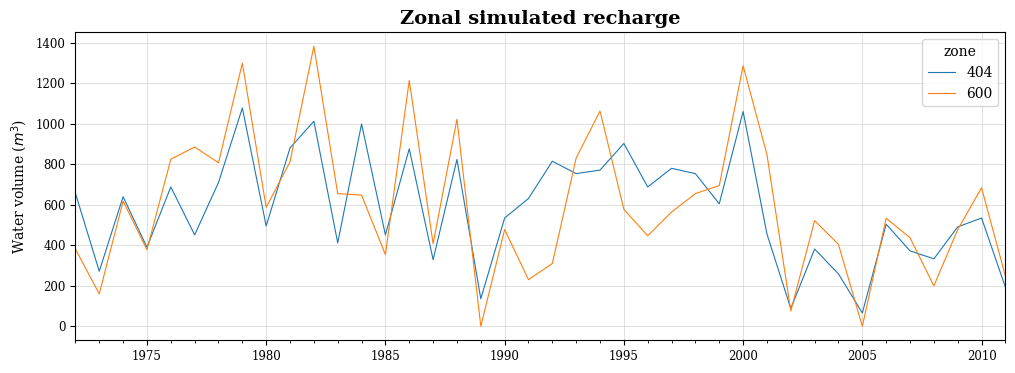

In [508]:
# -- Set zone ids
zones = [600, 404]

# -- Draw line plot
ax = (
    zb_df
    .loc[pd.IndexSlice[zones, :], 'Recharge_Maill']
    .reset_index()
    .pivot(index='date', columns='zone')
    .droplevel(0, axis=1)
    .plot(figsize=(12, 4), xlabel='', ylabel='Water volume ($m^3$)', lw=0.8, fontsize=8.5)
)

# -- Add title
ax.set_title('Zonal simulated recharge', fontweight='bold', fontsize=14)

# -- Add grid lines
ax.grid(lw=.5, c='lightgrey')